<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/part_2_simulation_master_project_alitalebi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

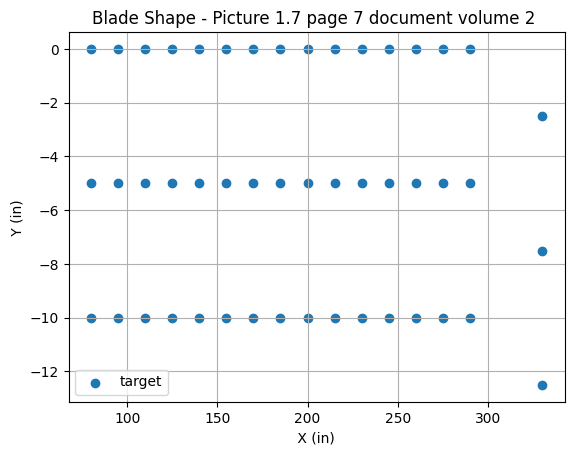

In [31]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [32]:
dict_28_24_blade_1 = {"r/R":[0.2001 , 0.2499 ,0.2998 , 0.3498 , 0.3913 , 0.4496 , 0.4997 , 0.5387 , 0.5996 , 0.6498 , 0.6998 , 0.7500 , 0.8001 , 0.8497 , 0.9102 , 0.9734 ] ,
              "Delta XMean (in.)" : [-0.0045 , -0.0011 , -0.0281 , -0.0177 , -0.0113 , -0.0186 , -0.0133 , -0.0232 , -0.0338 , -0.0307 , -0.0633 , -0.0773 , -0.0811 , -0.1920 , -0.2623 , -0.2629 ] ,
              "Delta XStd (in.)"  : [0.0010 , 0.0009 , 0.0011 , 0.0011 , 0.0016 , 0.0019 , 0.0022 , 0.0020 , 0.0019 , 0.0023 , 0.0021 , 0.0021 , 0.0021 , 0.0022 , 0.0023 , 0.0026 ] ,
              "Delta YMean (in.)" : [-0.0132 , -0.0225 , -0.0483 , -0.0939 , -0.1256 , -0.1809 , -0.2209 , -0.2510 , -0.3087 , -0.3422 , -0.3874 , -0.4184 , -0.5123 , -0.5296 , -0.5487 , -0.5354 ] ,
              "Delta YStd (in.)"  : [0.0007 , 0.0013 , 0.0028 , 0.0046 , 0.0066 , 0.0088 , 0.0111 , 0.0126 , 0.0150 , 0.0176 , 0.0201 , 0.0229 , 0.0258 , 0.0284 , 0.0313 , 0.0350 ]  ,
              "Delta ZMean (in.)" : [-0.0050 , -0.0010 , -0.0251  ,-0.0442 , -0.0622 , -0.1306 , -0.2121 , -0.3077 , -0.4860 , -0.7122 , -0.9213 , -1.1503 , -1.3874 , -1.7166 , -2.1240 , -2.5162 ] ,
              "Delta ZStd (in.)"  : [0.0023 , 0.0046 , 0.0089 , 0.0145 , 0.0211 , 0.0267 , 0.0347 , 0.0404 , 0.0480 , 0.0540 , 0.0607 , 0.0666 , 0.0718 , 0.0784 , 0.0857 , 0.0943 ]

}


table_28_24_blade_1 = pd.DataFrame(dict_28_24_blade_1)

In [33]:
table_28_24_blade_1

r/R  Delta XMean (in.)  Delta XStd (in.)  Delta YMean (in.)  \
0   0.2001            -0.0045            0.0010            -0.0132   
1   0.2499            -0.0011            0.0009            -0.0225   
2   0.2998            -0.0281            0.0011            -0.0483   
3   0.3498            -0.0177            0.0011            -0.0939   
4   0.3913            -0.0113            0.0016            -0.1256   
5   0.4496            -0.0186            0.0019            -0.1809   
6   0.4997            -0.0133            0.0022            -0.2209   
7   0.5387            -0.0232            0.0020            -0.2510   
8   0.5996            -0.0338            0.0019            -0.3087   
9   0.6498            -0.0307            0.0023            -0.3422   
10  0.6998            -0.0633            0.0021            -0.3874   
11  0.7500            -0.0773            0.0021            -0.4184   
12  0.8001            -0.0811            0.0021            -0.5123   
13  0.8497            -0.1920            0.0022            -0.5296   
14  0.9102            -0.2623            0.0023            -0.5487   
15  0.9734            -0.2629            0.0026            -0.5354   

    Delta YStd (in.)  Delta ZMean (in.)  Delta ZStd (in.)  
0             0.0007            -0.0050            0.0023  
1             0.0013            -0.0010            0.0046  
2             0.0028            -0.0251            0.0089  
3             0.0046            -0.0442            0.0145  
4             0.0066            -0.0622            0.0211  
5             0.0088            -0.1306            0.0267  
6             0.0111            -0.2121            0.0347  
7             0.0126            -0.3077            0.0404  
8             0.0150            -0.4860            0.0480  
9             0.0176            -0.7122            0.0540  
10            0.0201            -0.9213            0.0607  
11            0.0229            -1.1503            0.0666  
12            0.0258            -1.3874            0.0718  
13            0.0284            -1.7166            0.0784  
14            0.0313            -2.1240            0.0857  
15            0.0350            -2.5162            0.0943

Mse is :  0.06454403265376267
-0.7517286743642984 -0.7167098601179199 0.005882522591409894
Formula : z = -0.7517286743642984+-0.7167098601179199x+0.005882522591409894y


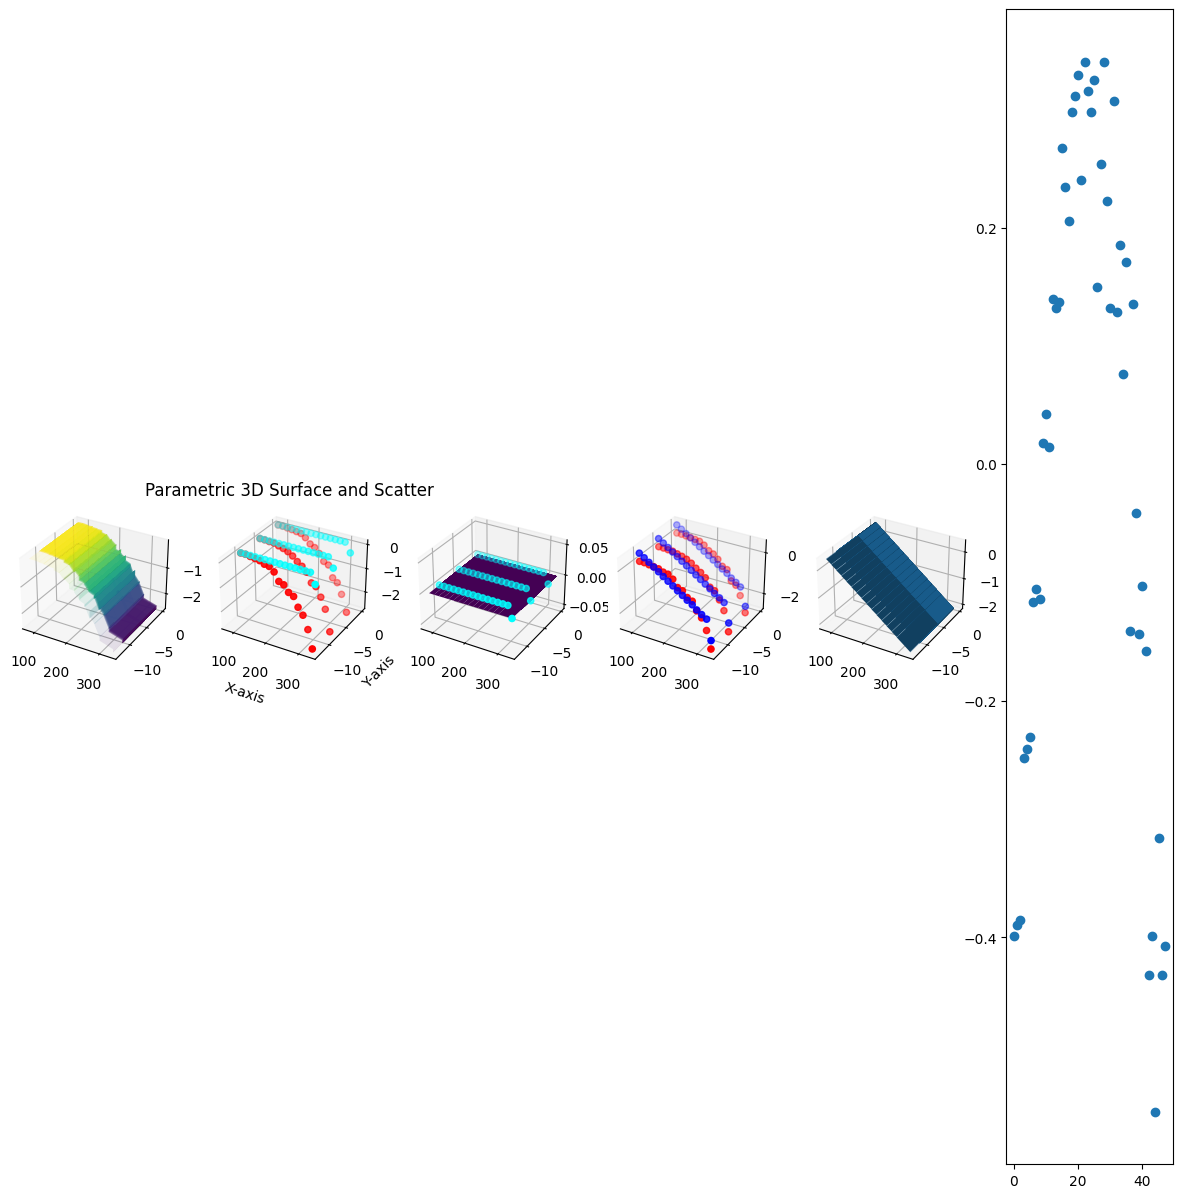

//////// ******************** ///////
Mse is :  0.09270956374435634
-0.7575747744859263 -0.7832559413437679 -0.027122526616644976
Formula : z = -0.7575747744859263+-0.7832559413437679x+-0.027122526616644976y


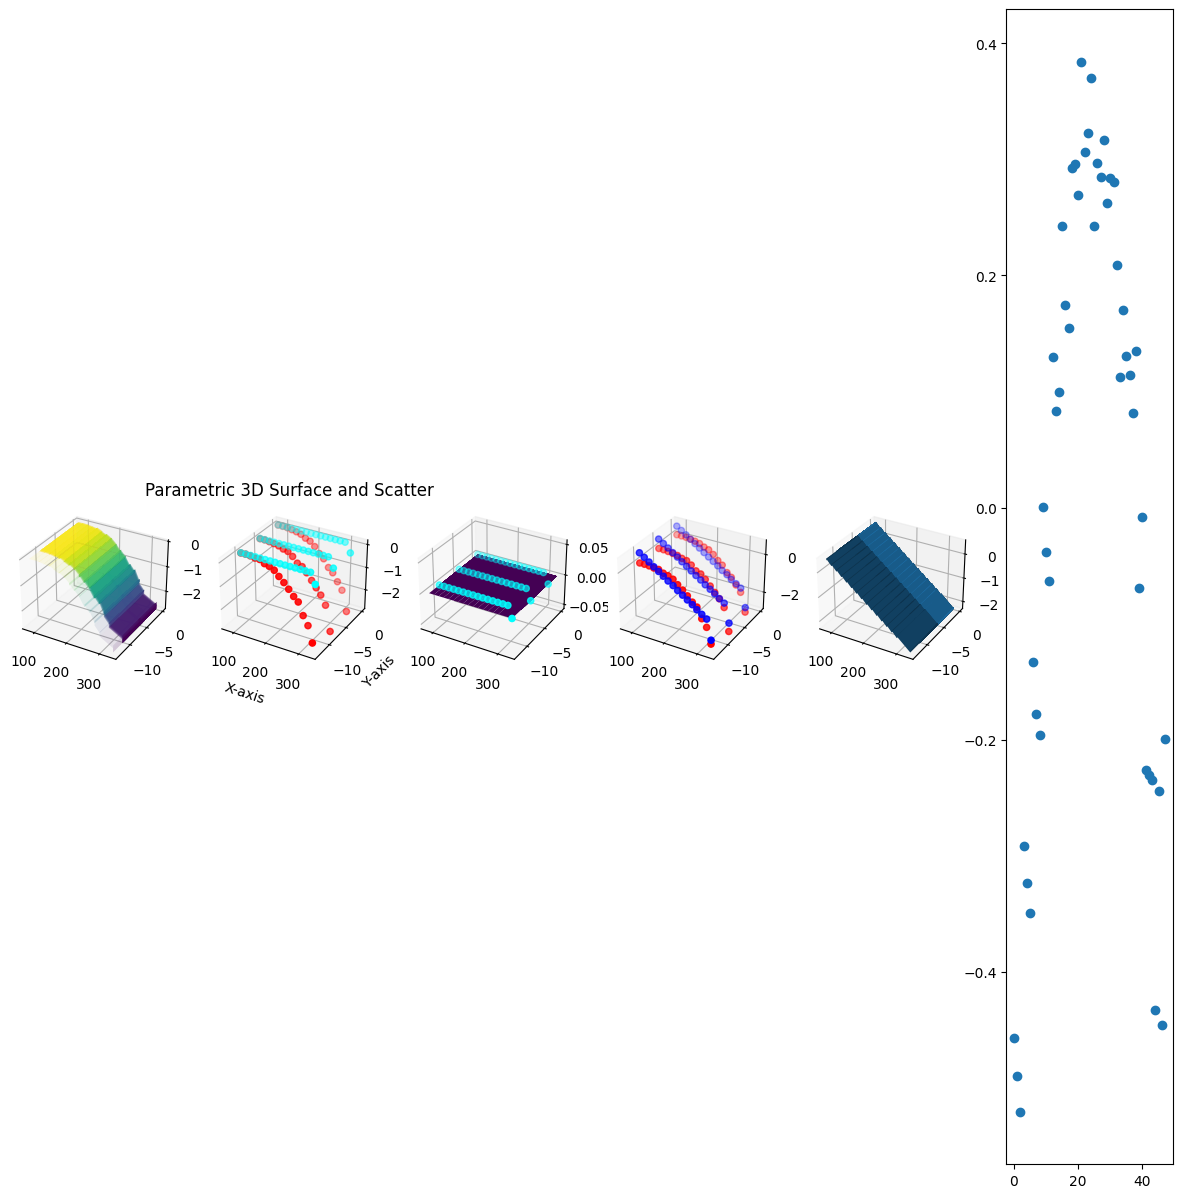

//////// ******************** ///////
Mse is :  0.08026499727114038
-0.7595904259273255 -0.7541071268209865 0.031271326163202634
Formula : z = -0.7595904259273255+-0.7541071268209865x+0.031271326163202634y


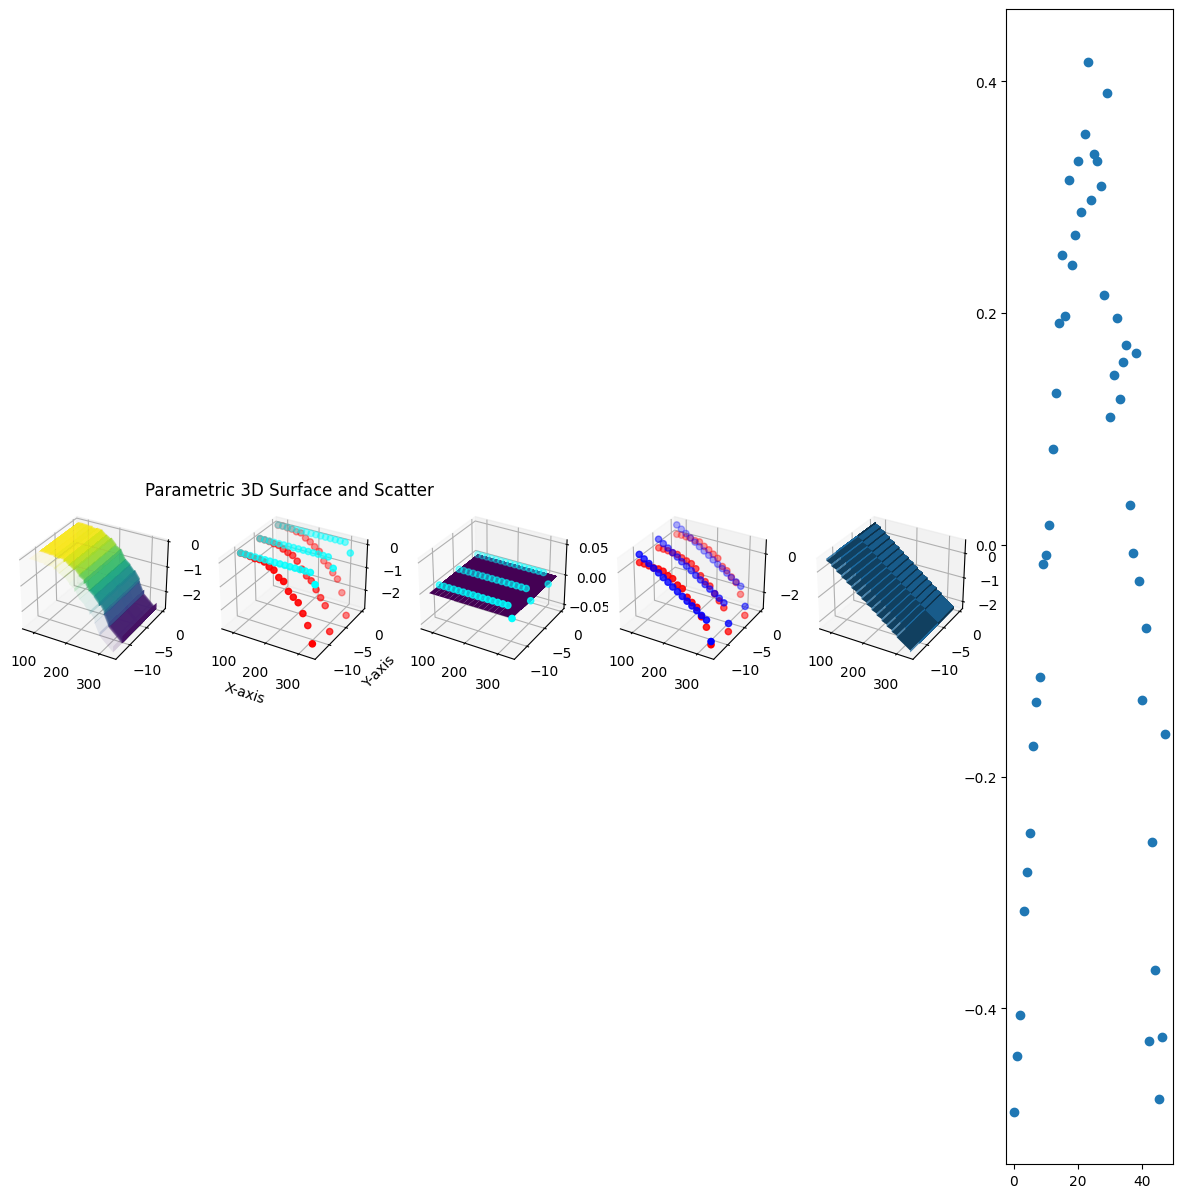

//////// ******************** ///////
Mse is :  0.10519417992601404
-0.6792979380669457 -0.741613326708475 0.04077166433365316
Formula : z = -0.6792979380669457+-0.741613326708475x+0.04077166433365316y


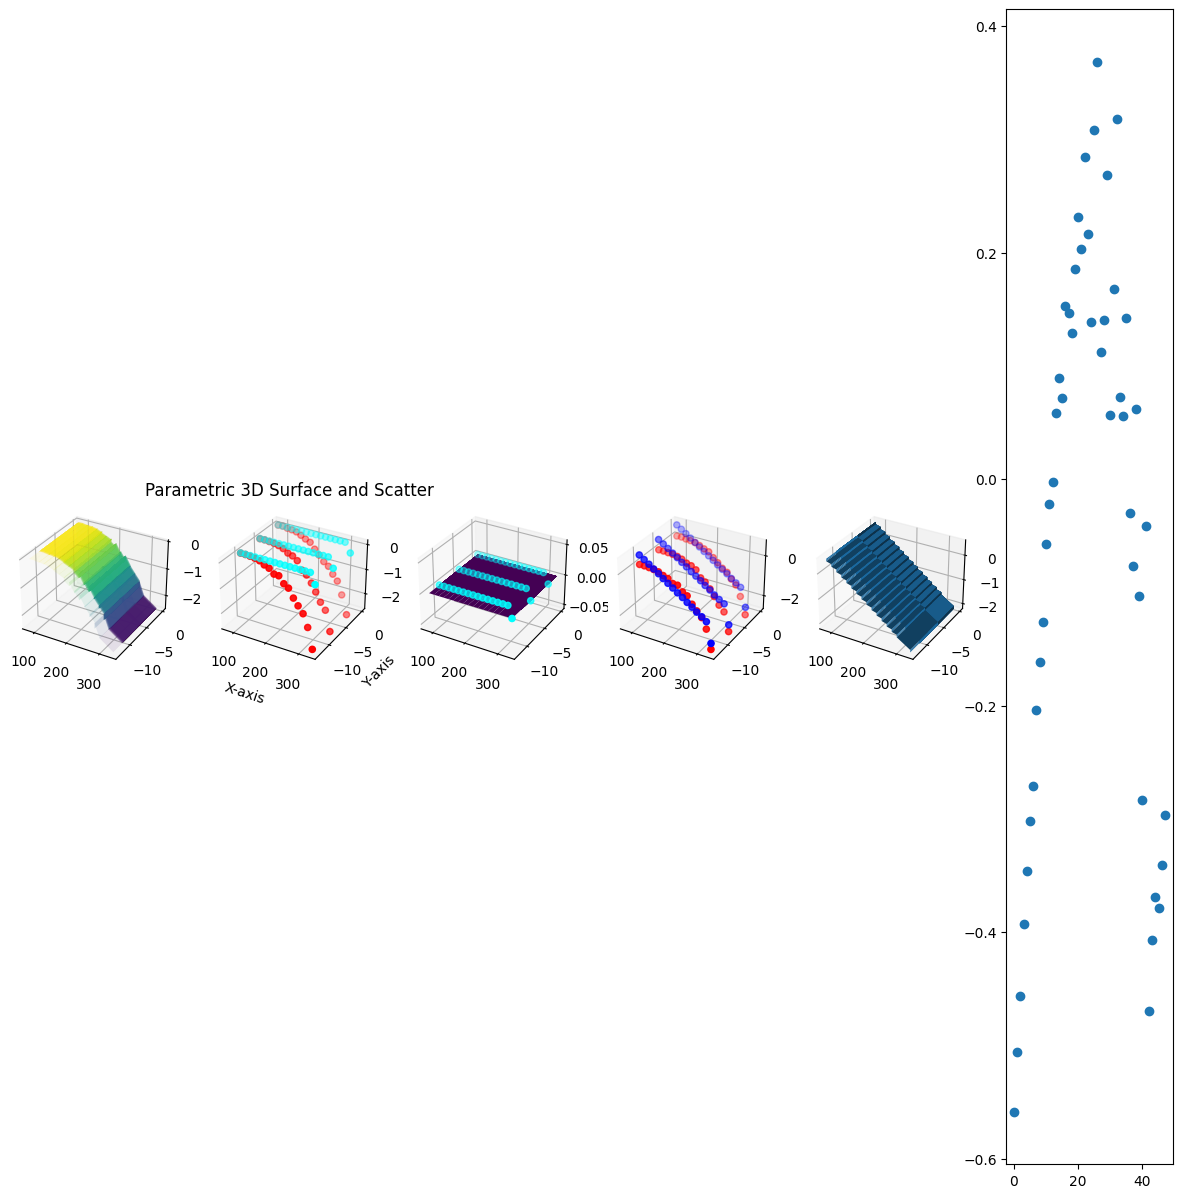

//////// ******************** ///////
Mse is :  0.08312859605045575
-0.7009876516874596 -0.7677500171332278 0.01707362794155424
Formula : z = -0.7009876516874596+-0.7677500171332278x+0.01707362794155424y


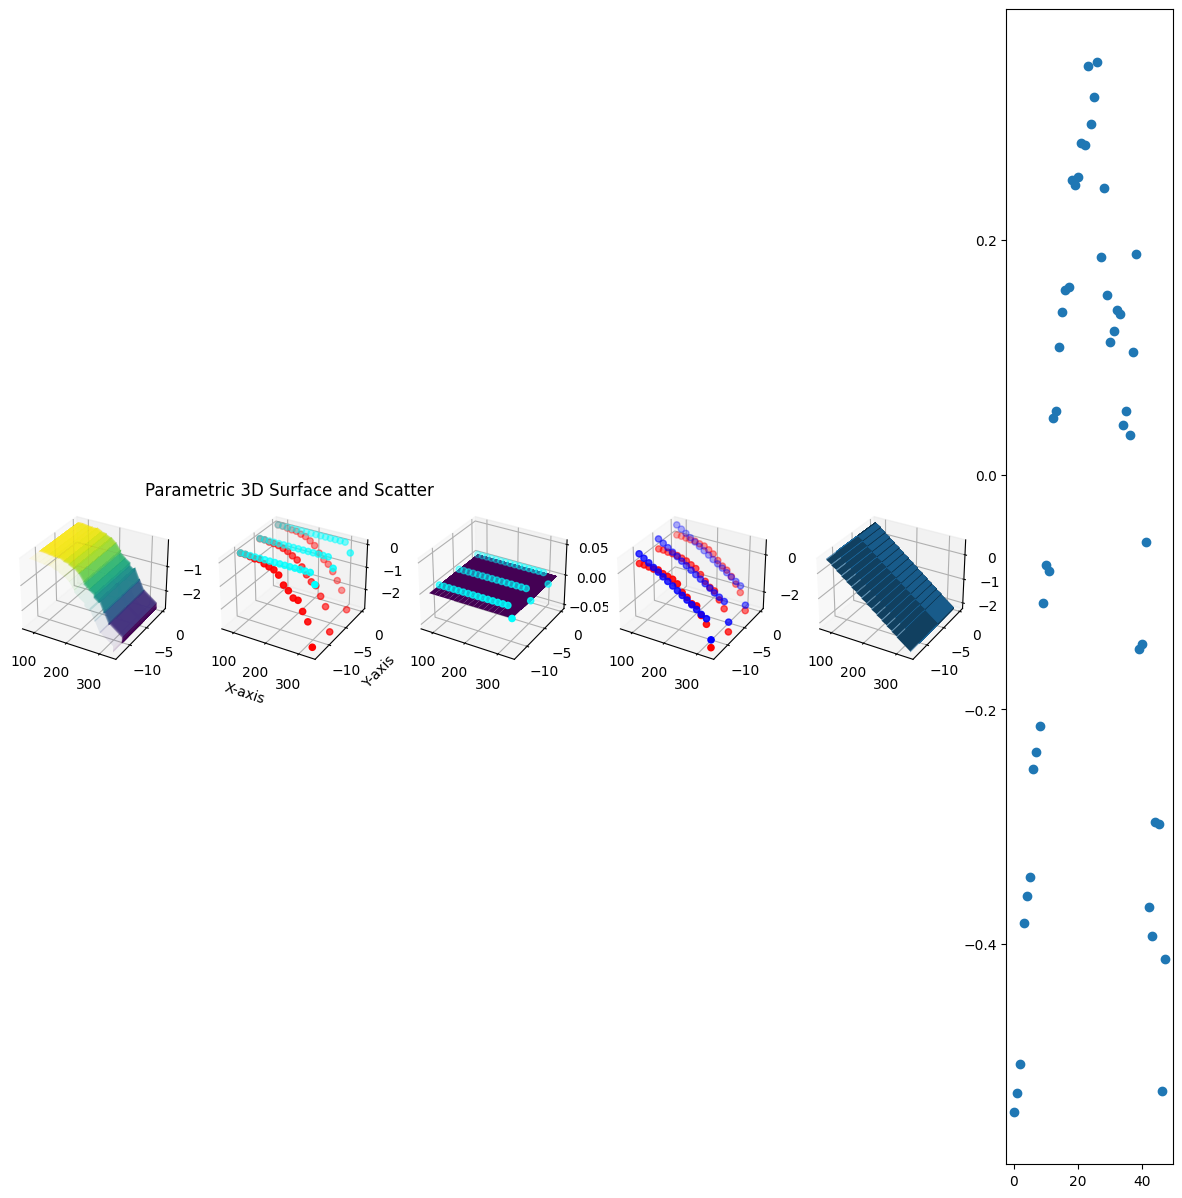

//////// ******************** ///////
Mse is :  0.06377231888431388
-0.737379751012265 -0.7357206325015916 -0.020668364588435784
Formula : z = -0.737379751012265+-0.7357206325015916x+-0.020668364588435784y


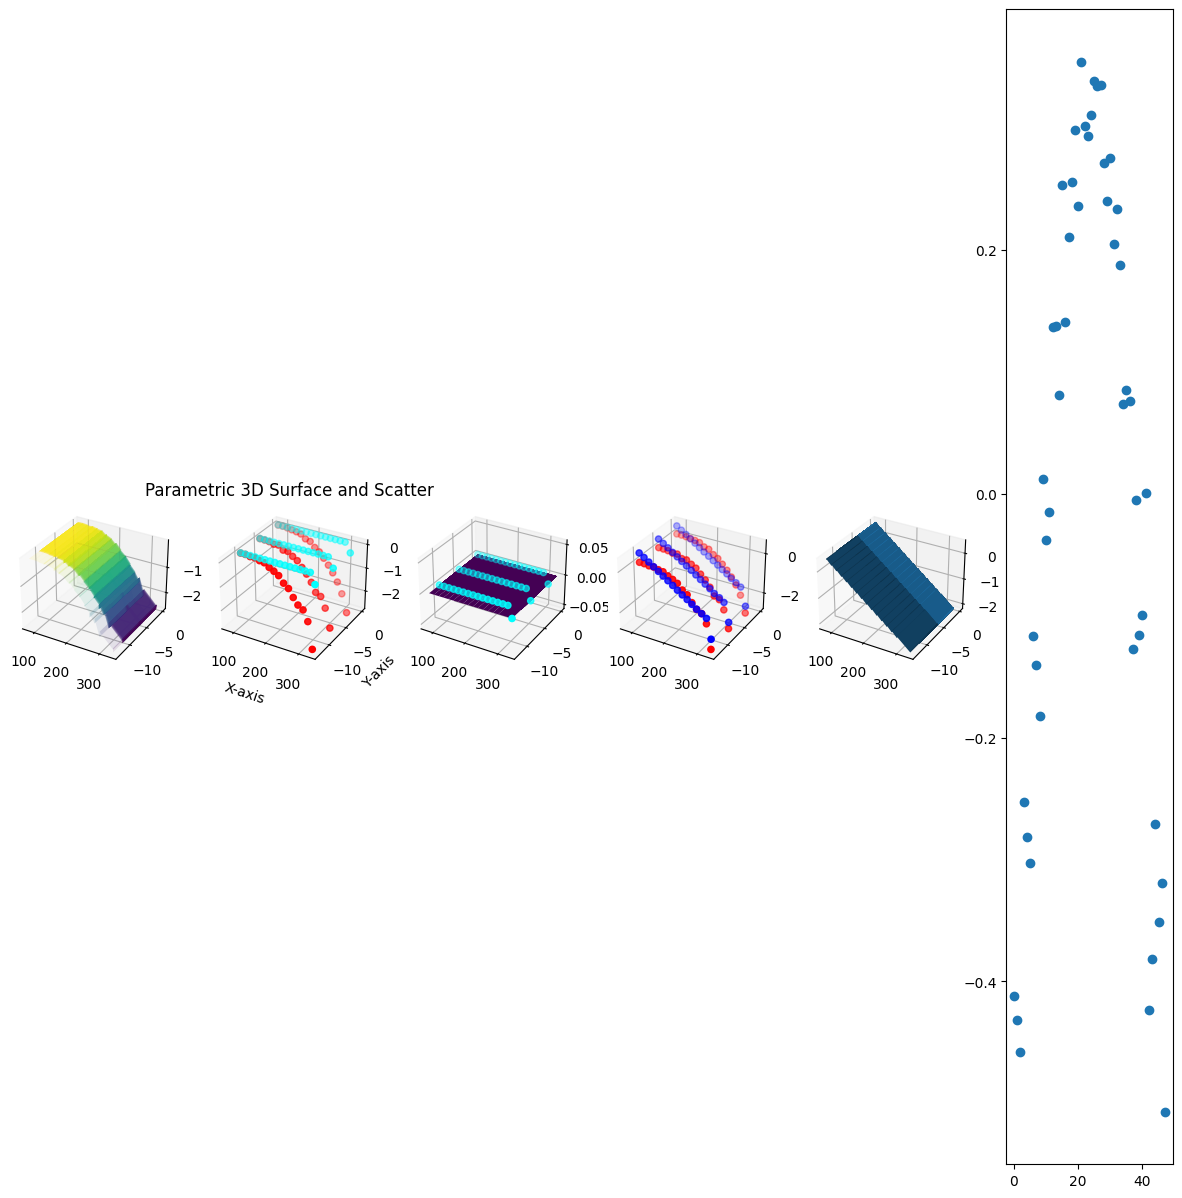

//////// ******************** ///////
Mse is :  0.08057588196725136
-0.7372486604335585 -0.7808005588267555 0.028328723653599622
Formula : z = -0.7372486604335585+-0.7808005588267555x+0.028328723653599622y


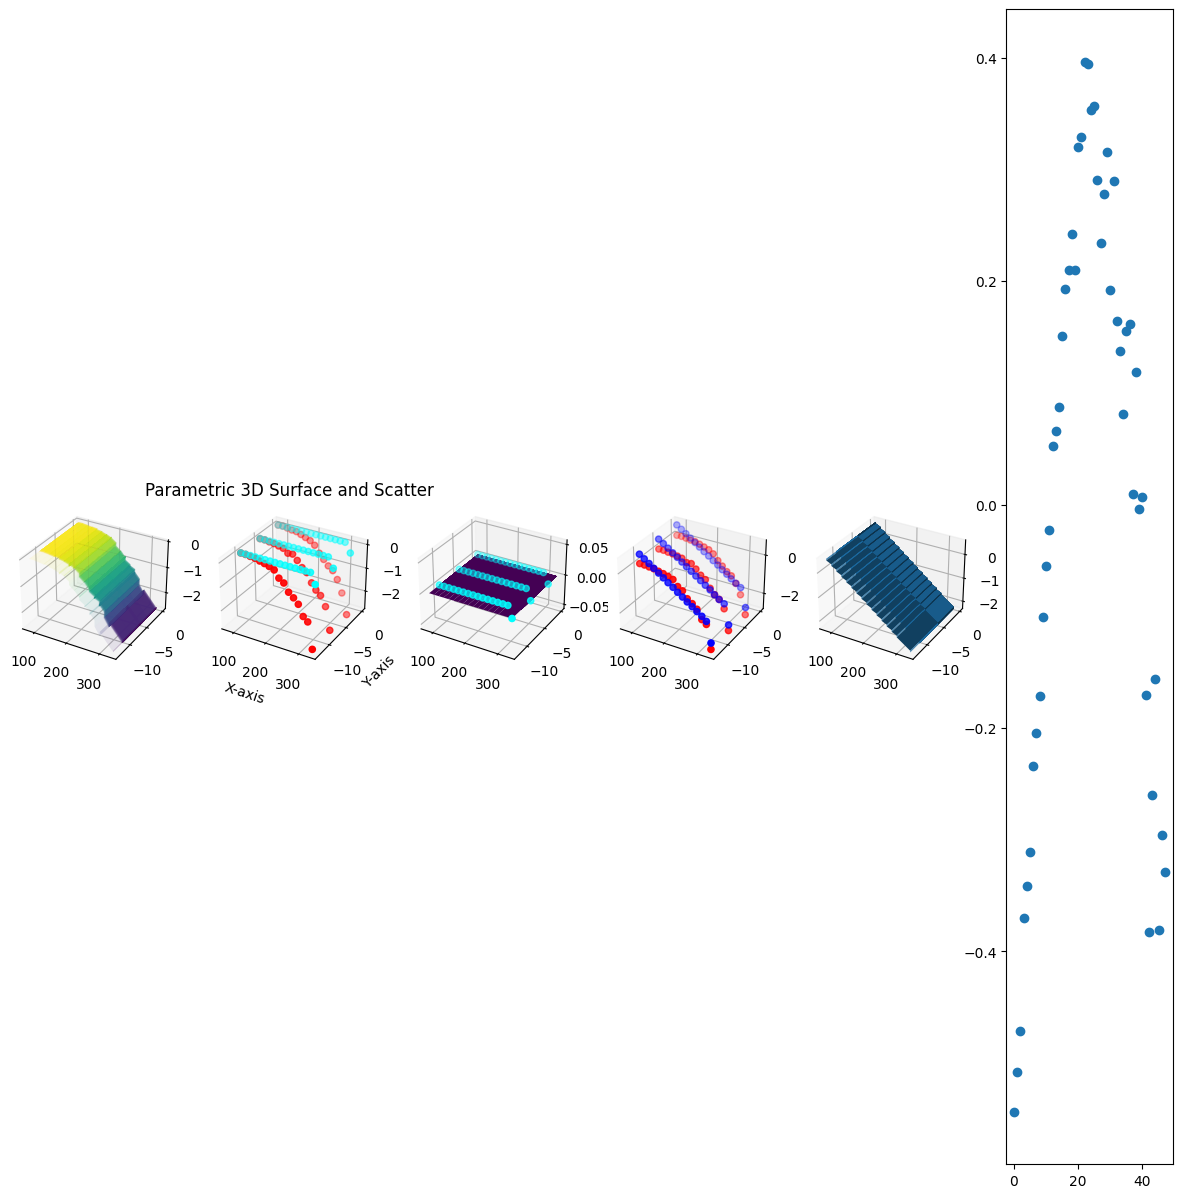

//////// ******************** ///////
Mse is :  0.09312814017091575
-0.717592914997176 -0.799976751249788 -0.006744853513185913
Formula : z = -0.717592914997176+-0.799976751249788x+-0.006744853513185913y


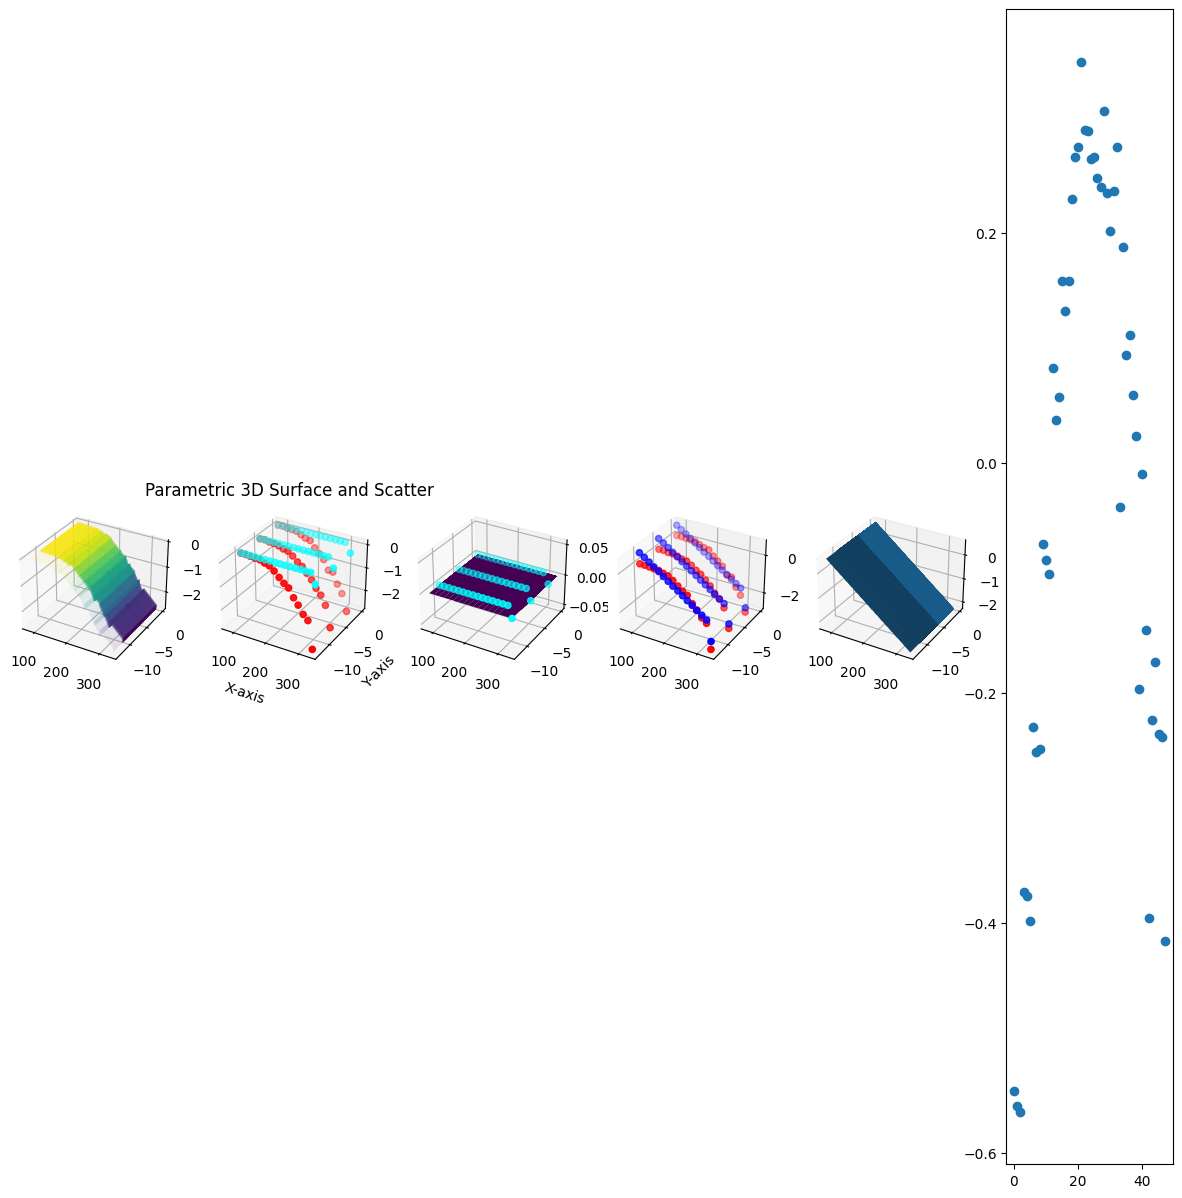

//////// ******************** ///////
Mse is :  0.05973907075395077
-0.7331937472146531 -0.782858449551535 0.028232263835596544
Formula : z = -0.7331937472146531+-0.782858449551535x+0.028232263835596544y


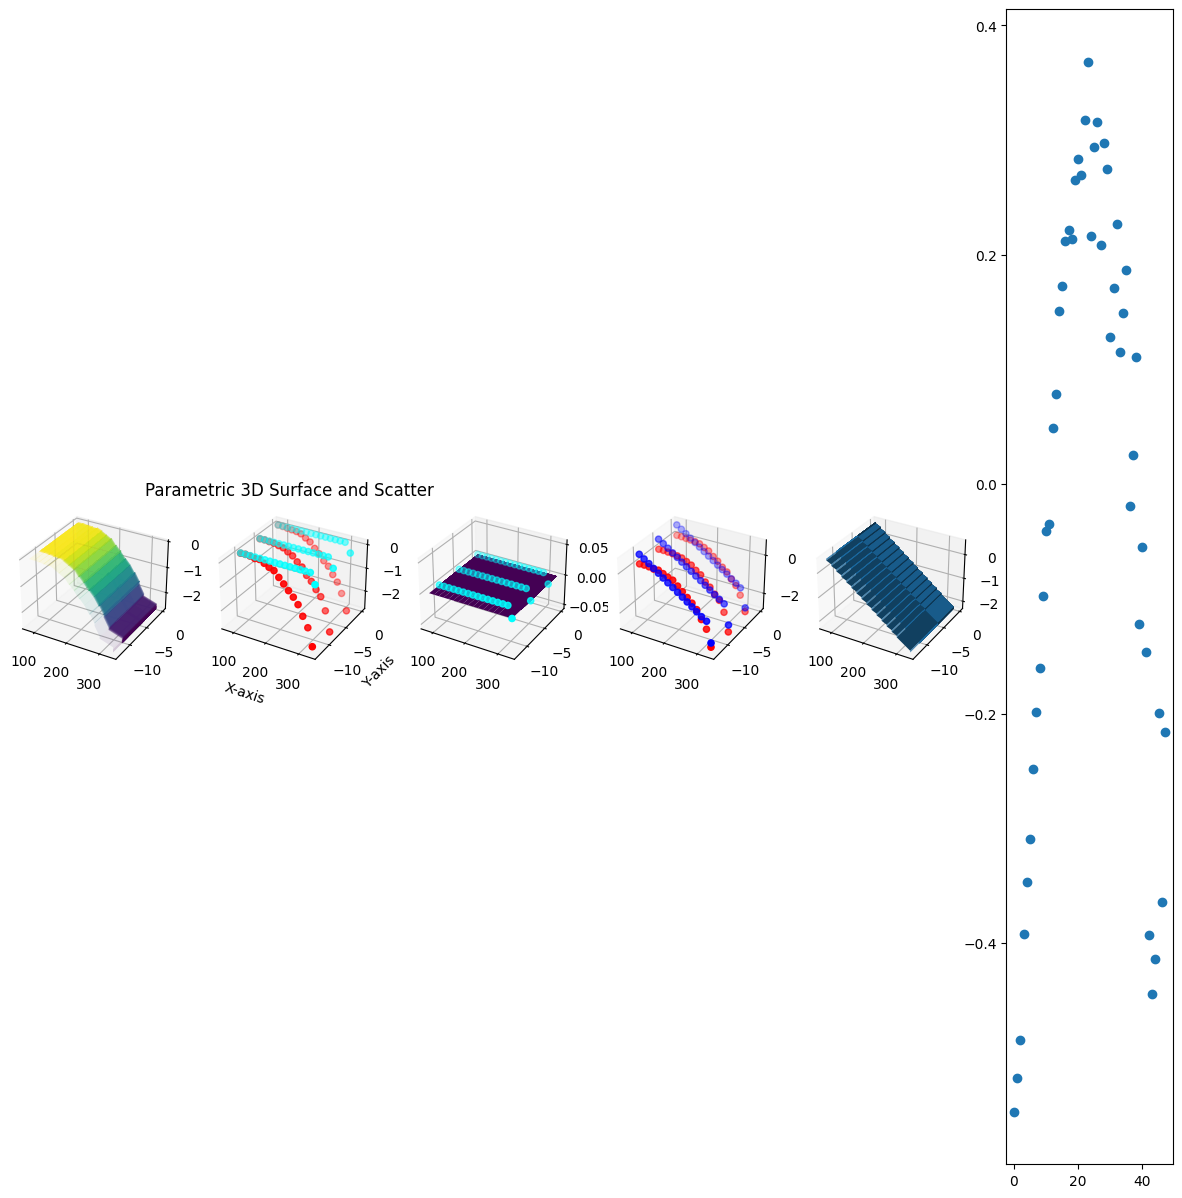

//////// ******************** ///////
Mse is :  0.07767026179483891
-0.7403706190322923 -0.7647926132912269 0.0192747668650102
Formula : z = -0.7403706190322923+-0.7647926132912269x+0.0192747668650102y


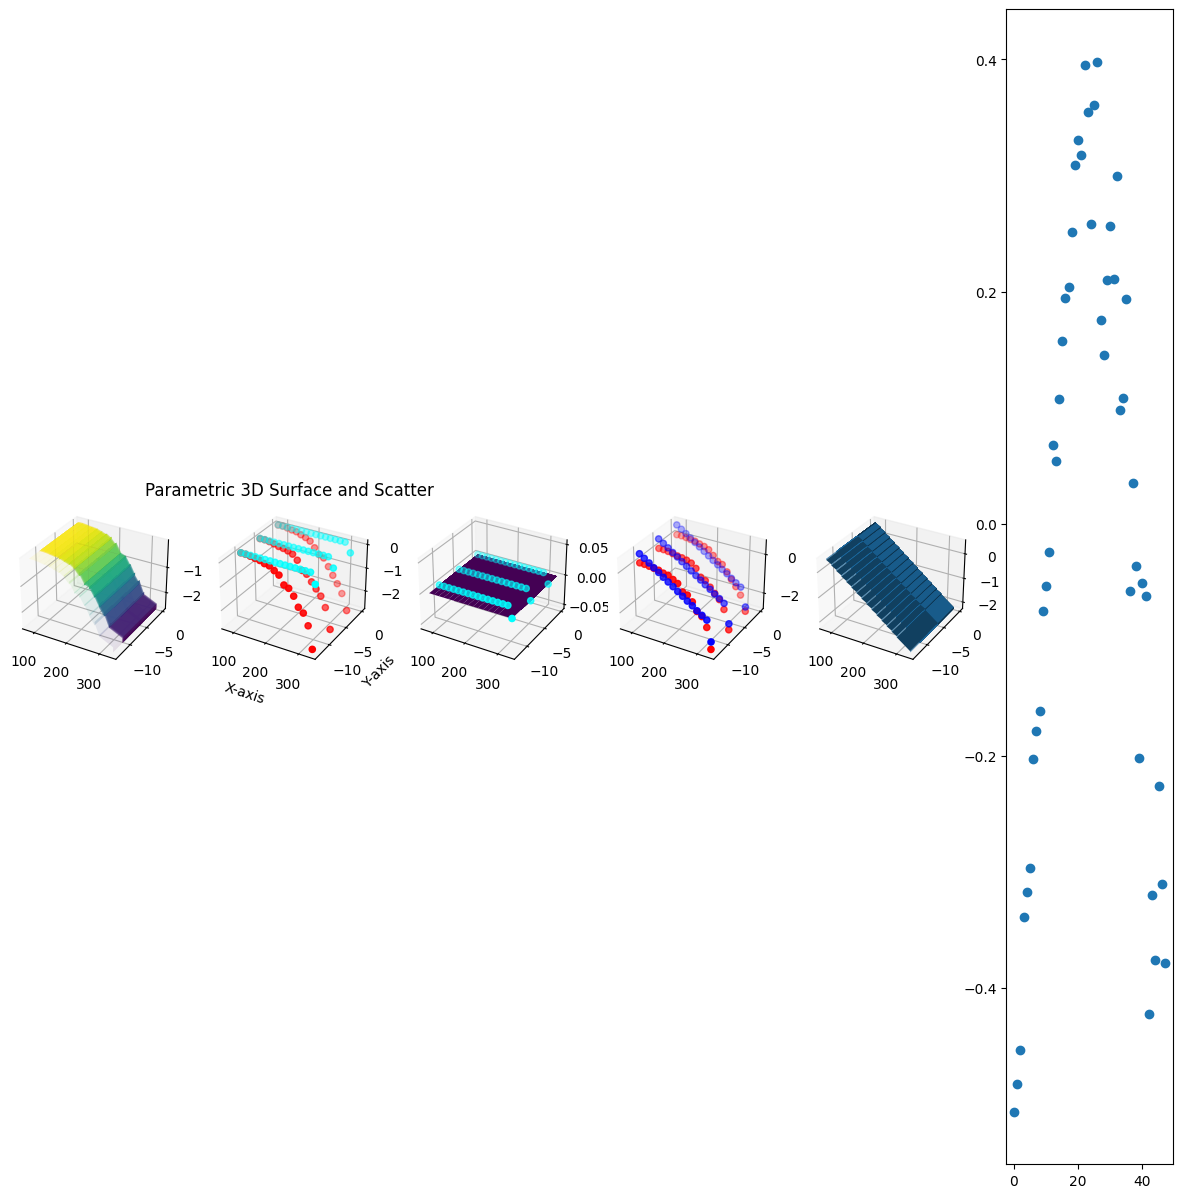

//////// ******************** ///////
Mse is :  0.06404620381468404
-0.7137798246539353 -0.7499048642330058 -0.009020216850362778
Formula : z = -0.7137798246539353+-0.7499048642330058x+-0.009020216850362778y


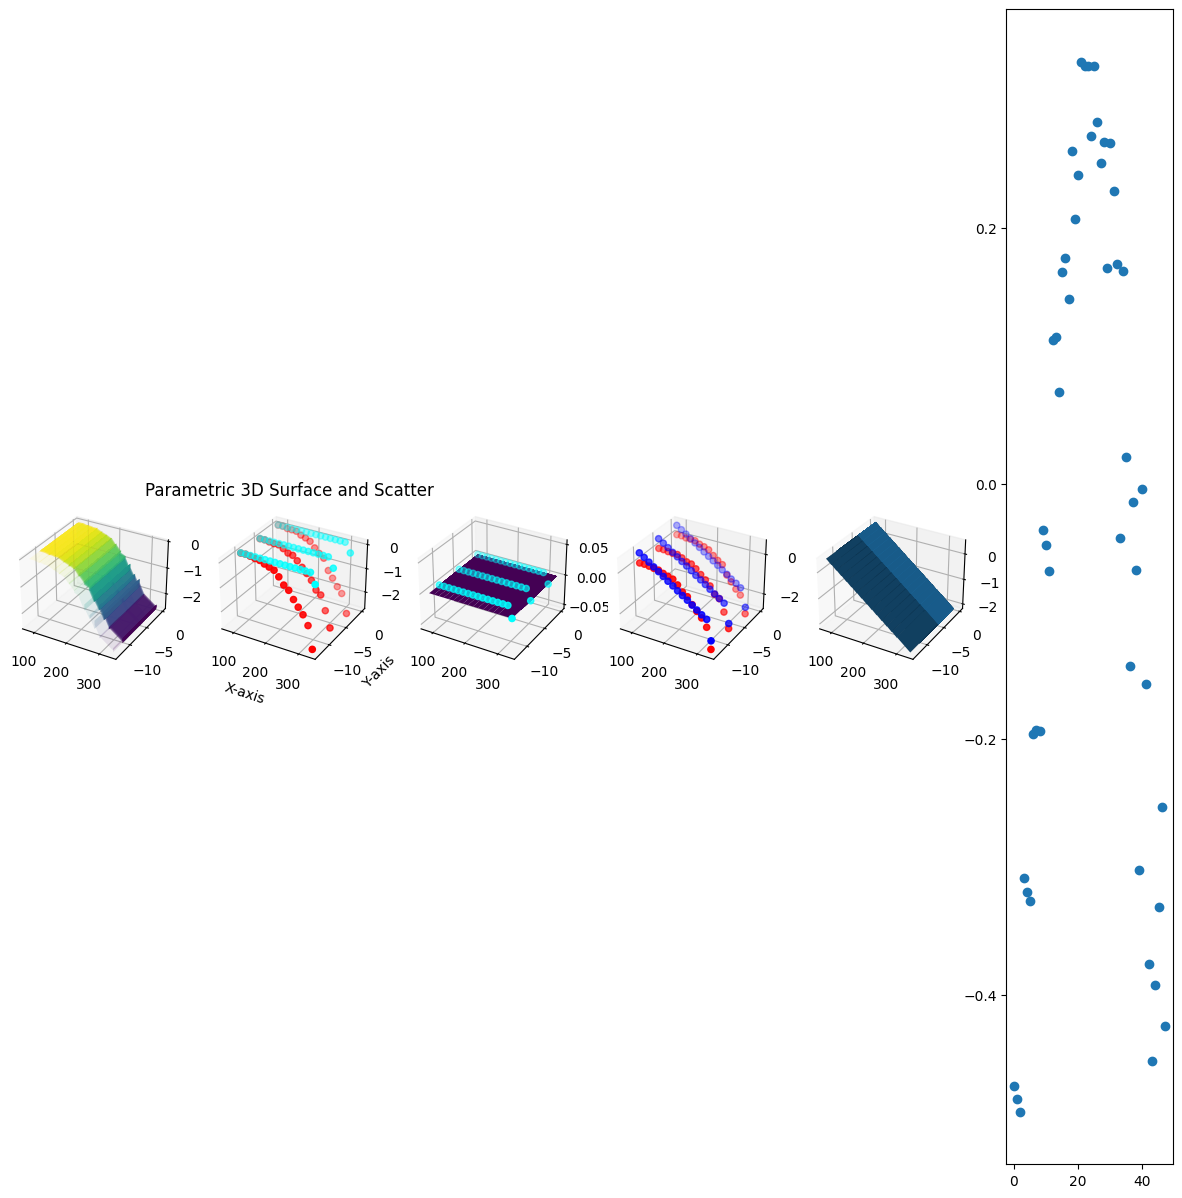

//////// ******************** ///////
Mse is :  0.07412645120352791
-0.7123258498978787 -0.7665700724517306 0.04145845372224948
Formula : z = -0.7123258498978787+-0.7665700724517306x+0.04145845372224948y


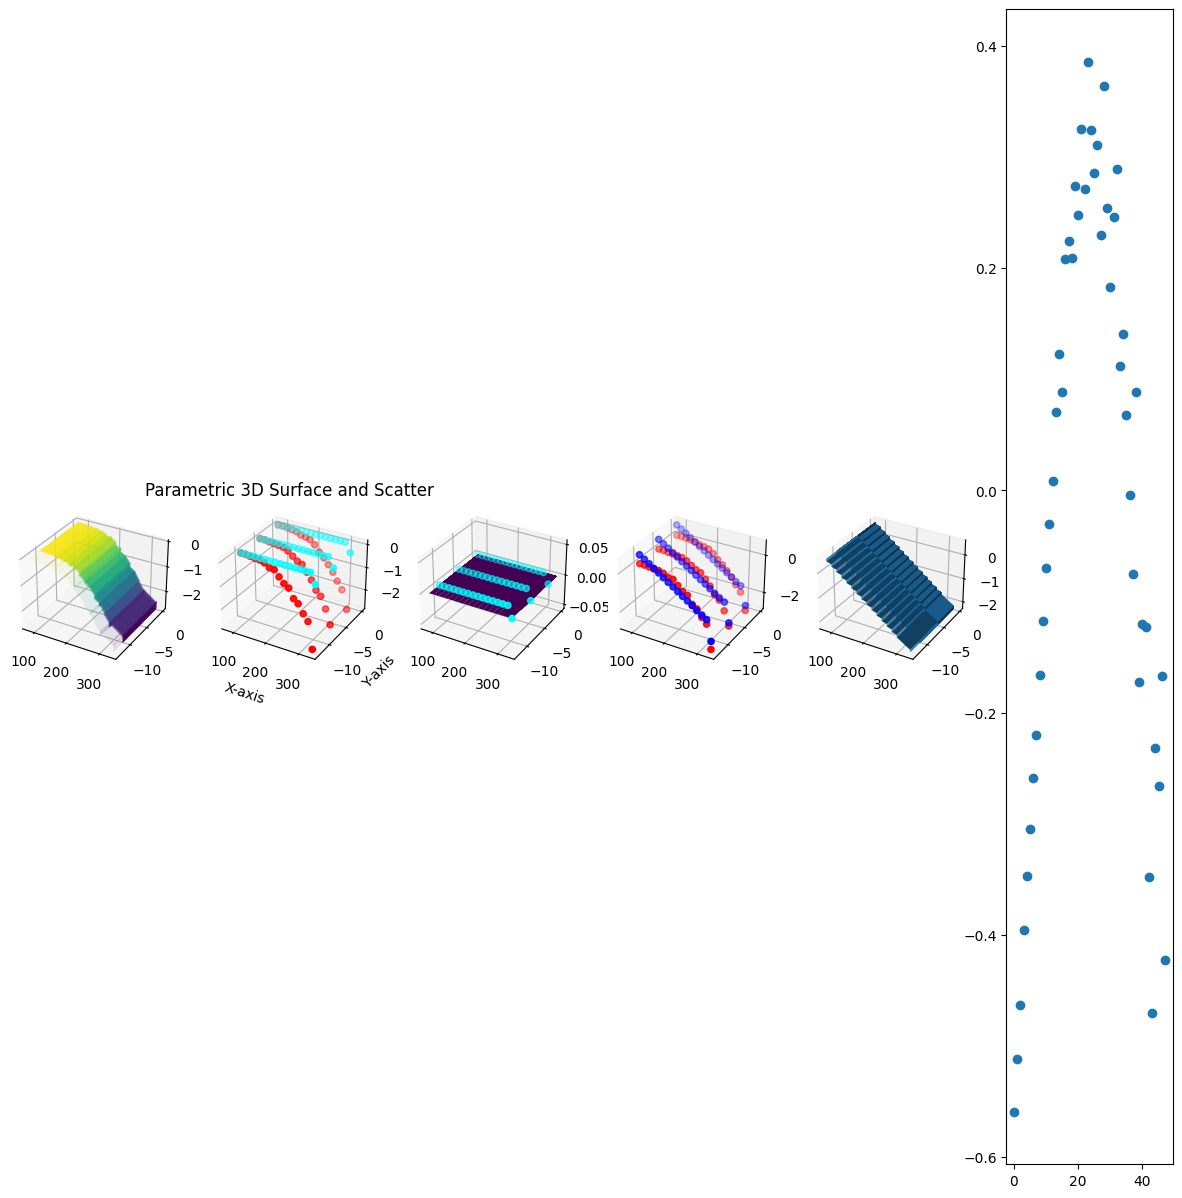

//////// ******************** ///////
Mse is :  0.07511176567770514
-0.7736105105492916 -0.7628227652722172 0.02663637304506362
Formula : z = -0.7736105105492916+-0.7628227652722172x+0.02663637304506362y


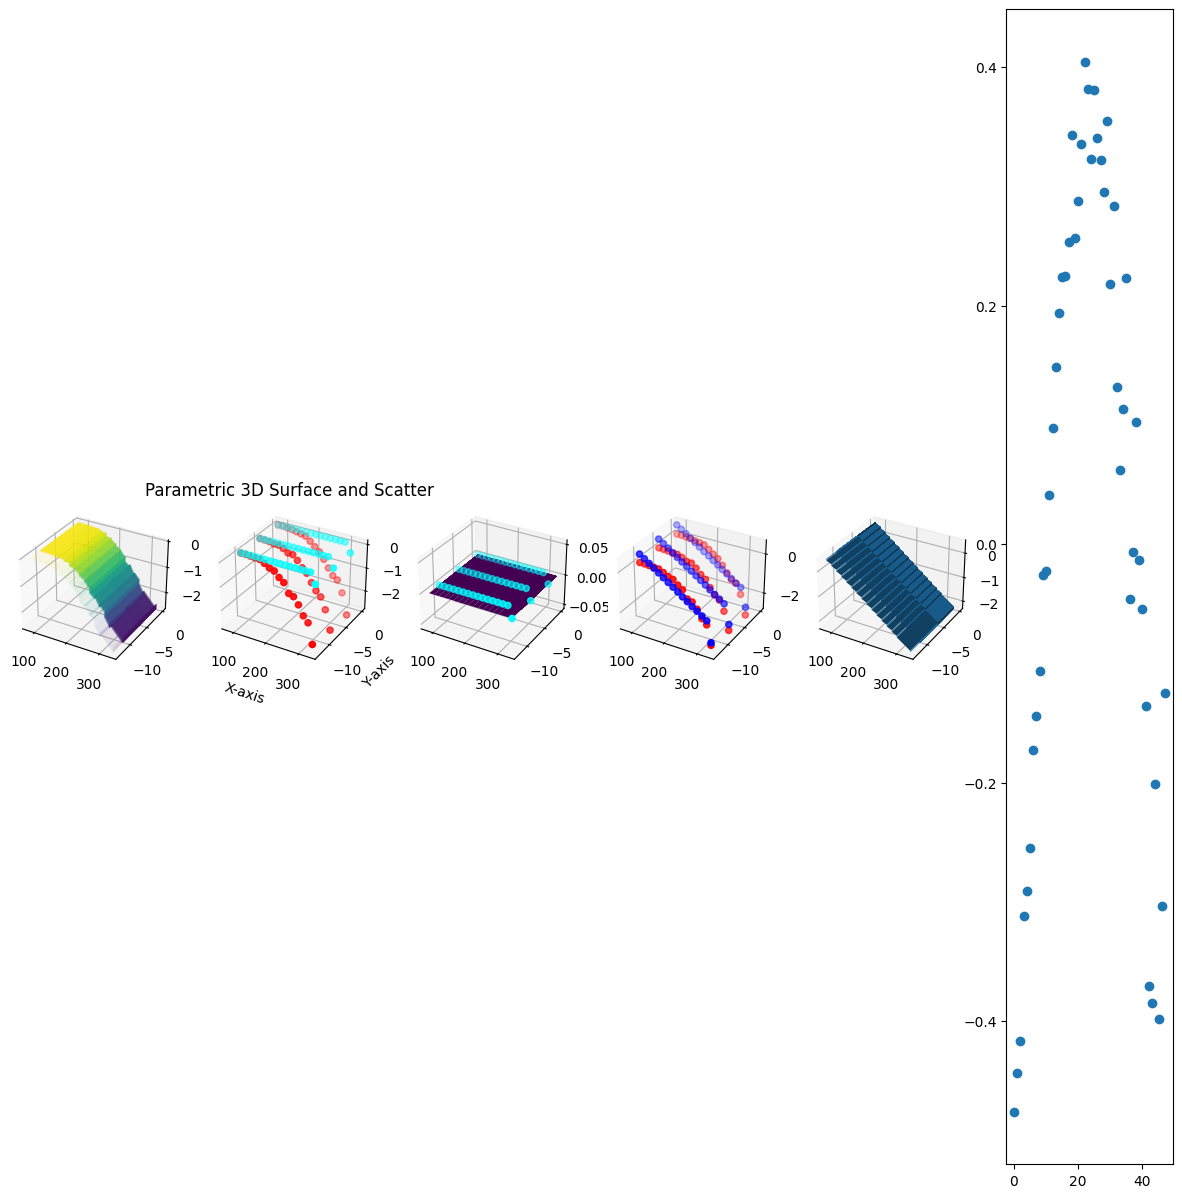

//////// ******************** ///////
Mse is :  0.1266953779144217
-0.7197762267295315 -0.8053255838779806 0.058126095425778984
Formula : z = -0.7197762267295315+-0.8053255838779806x+0.058126095425778984y


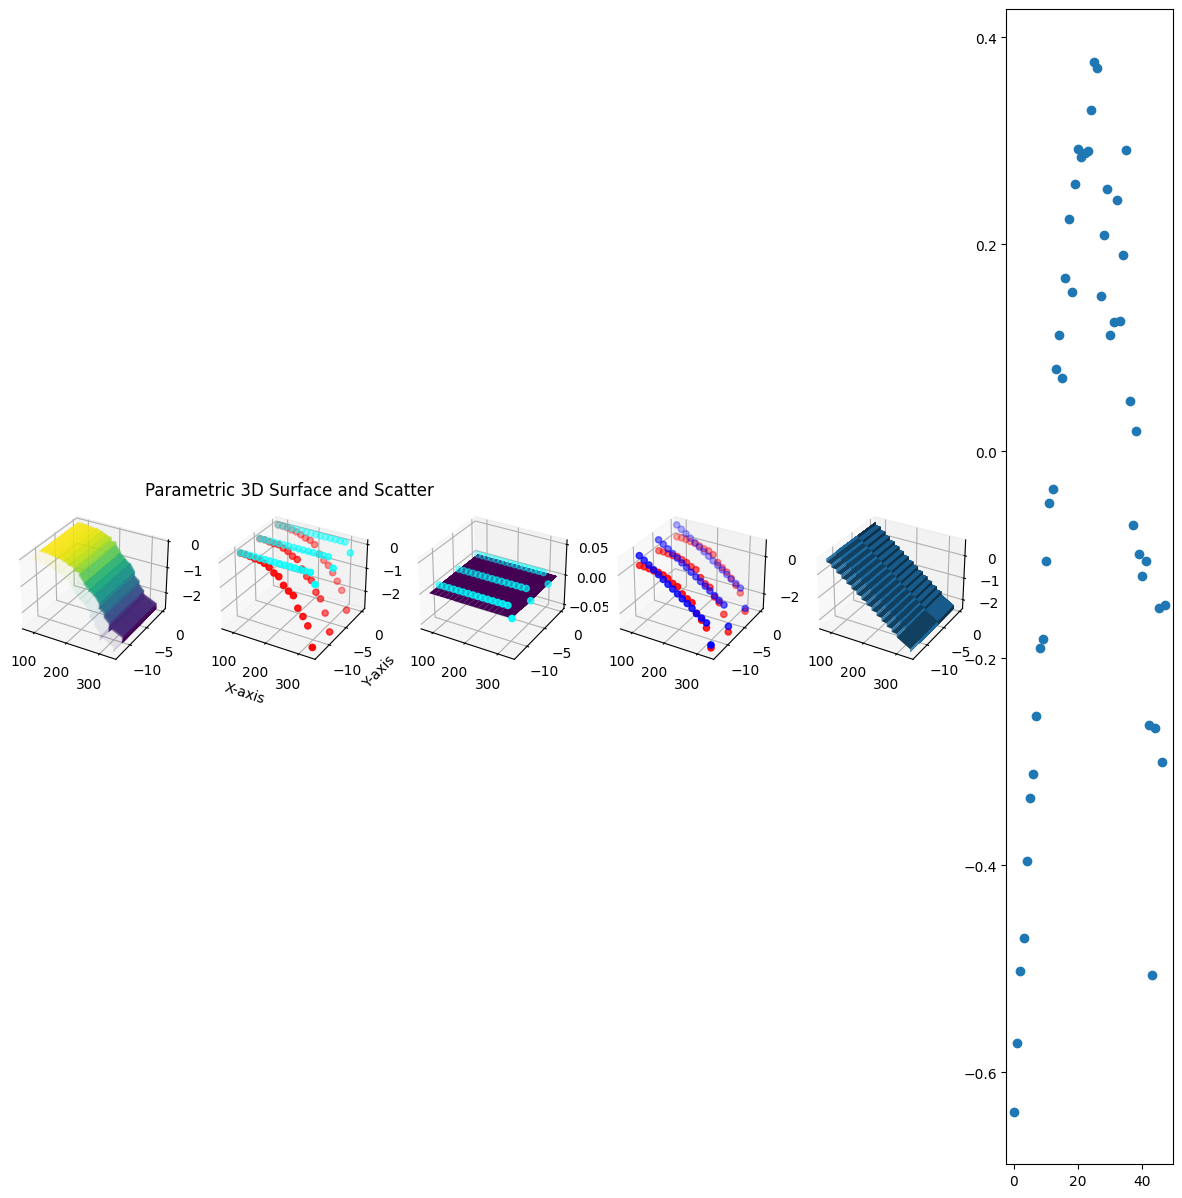

//////// ******************** ///////
Mse is :  0.08055909851738276
-0.7262614086136024 -0.7719705188170337 -0.002261436246608657
Formula : z = -0.7262614086136024+-0.7719705188170337x+-0.002261436246608657y


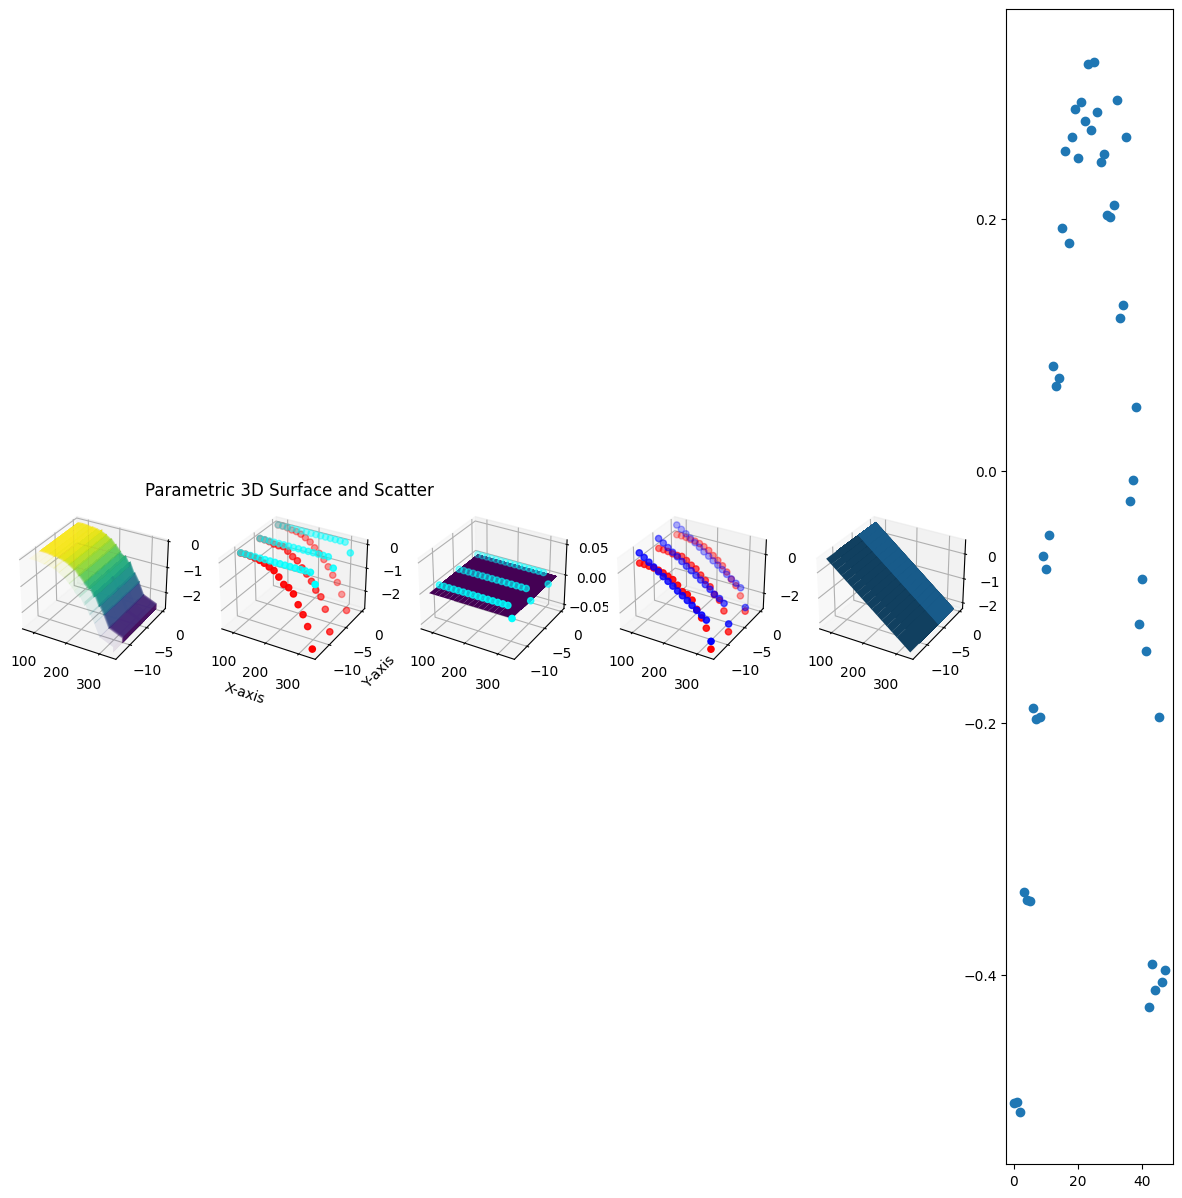

//////// ******************** ///////
Mse is :  0.08977081191022414
-0.7506530904820721 -0.806946735109892 0.013534613520795246
Formula : z = -0.7506530904820721+-0.806946735109892x+0.013534613520795246y


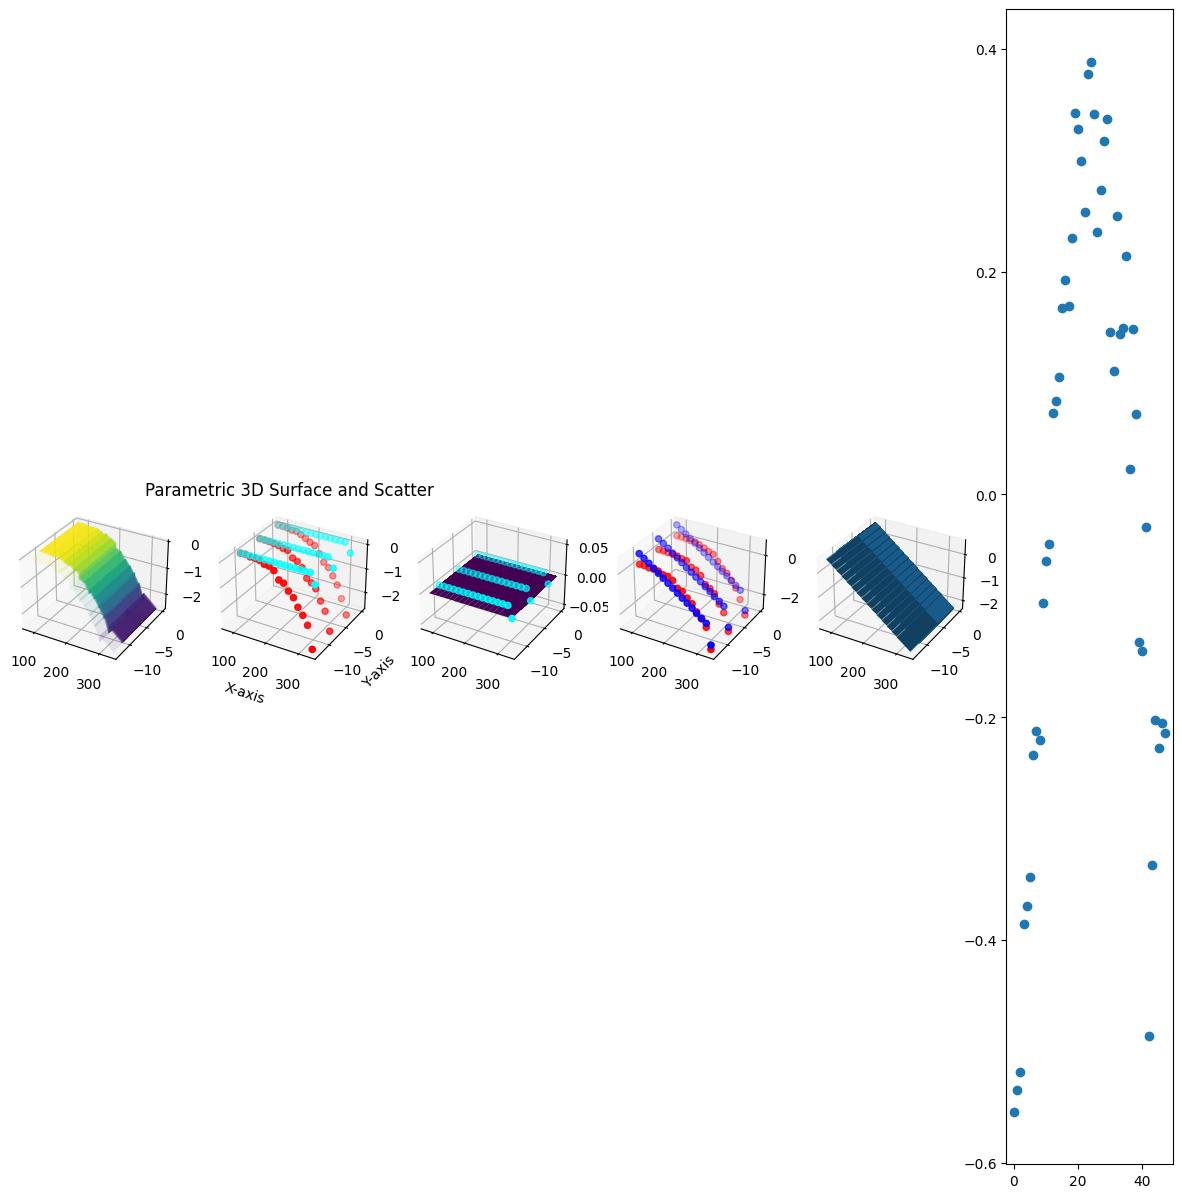

//////// ******************** ///////
Mse is :  0.06618362848175172
-0.7621350114212485 -0.7287139111556551 0.013706176778123058
Formula : z = -0.7621350114212485+-0.7287139111556551x+0.013706176778123058y


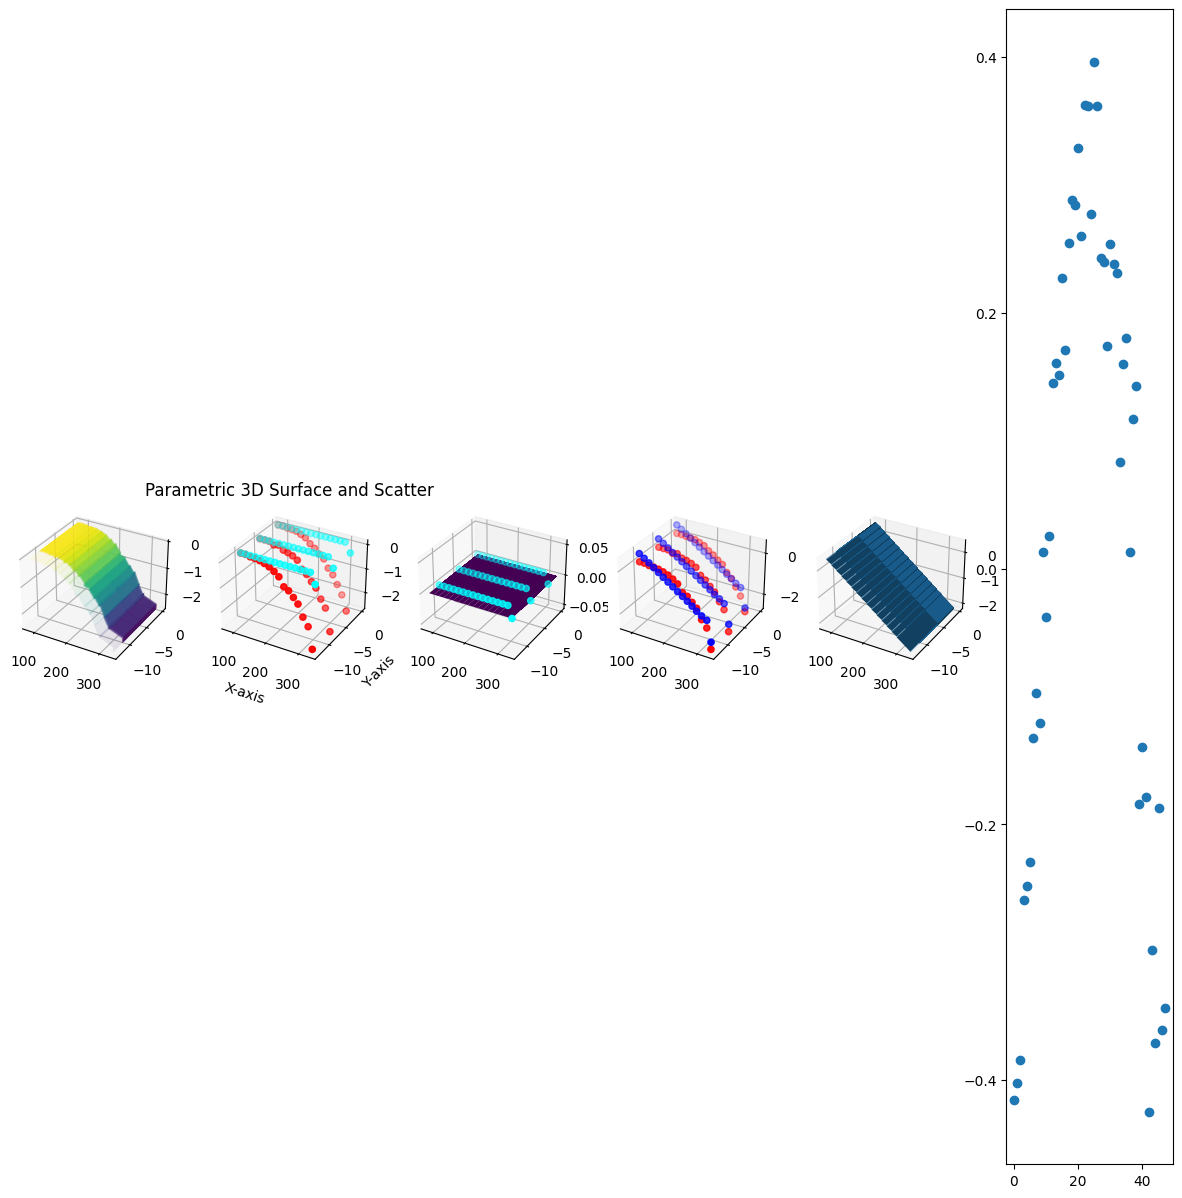

//////// ******************** ///////
Mse is :  0.10445798633958753
-0.7249963214619709 -0.7331865462064321 0.043253674944031394
Formula : z = -0.7249963214619709+-0.7331865462064321x+0.043253674944031394y


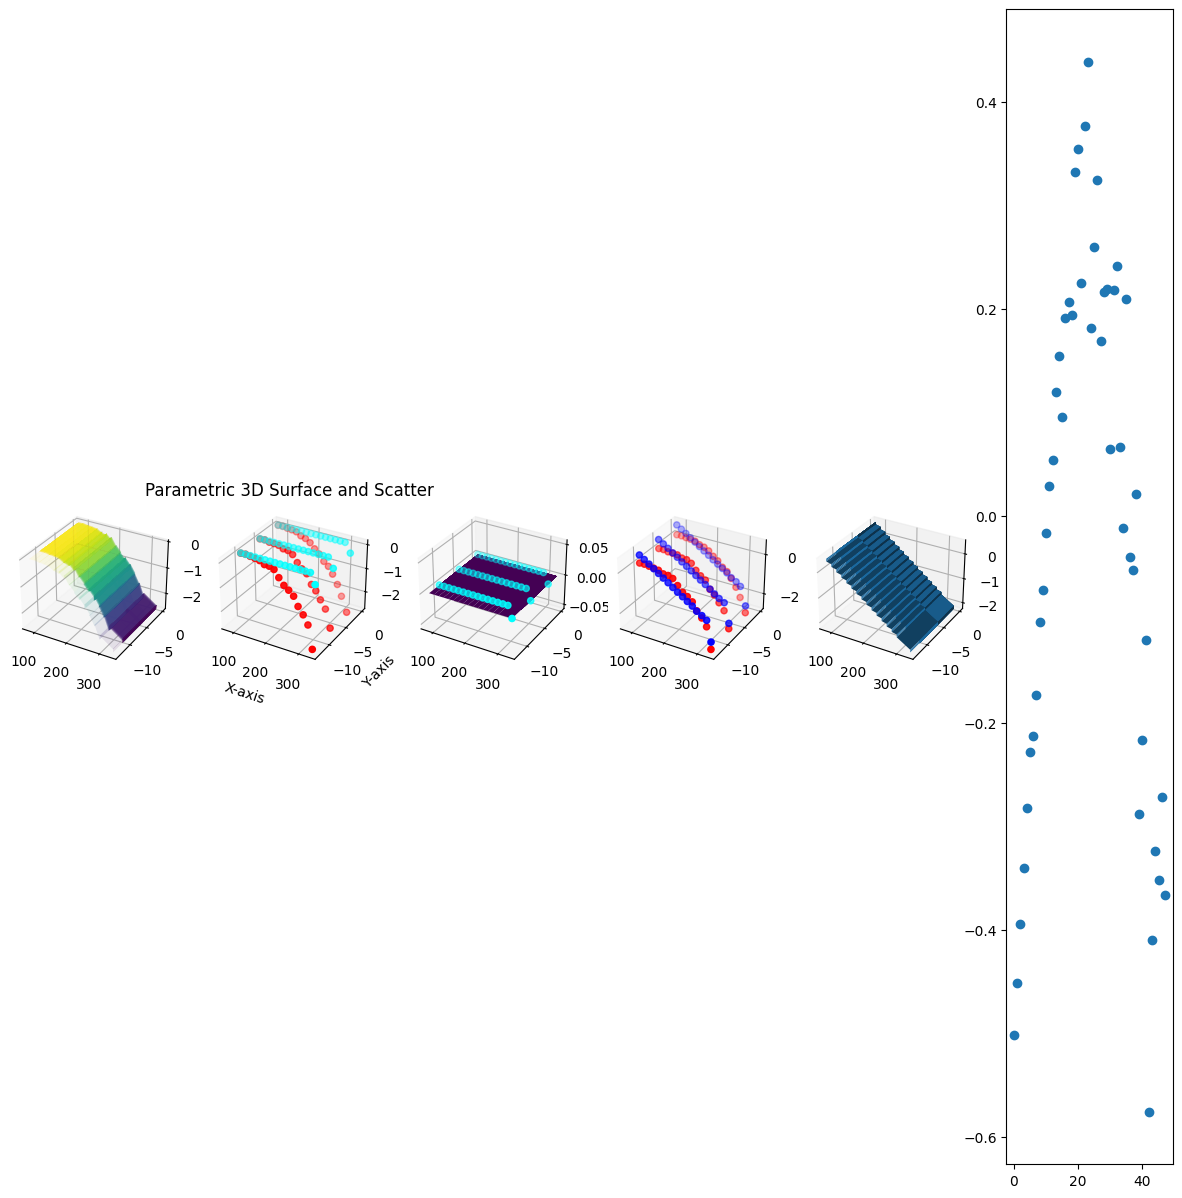

//////// ******************** ///////
Mse is :  0.056804931712411216
-0.7616004672128798 -0.7346566279405765 0.021437104435621013
Formula : z = -0.7616004672128798+-0.7346566279405765x+0.021437104435621013y


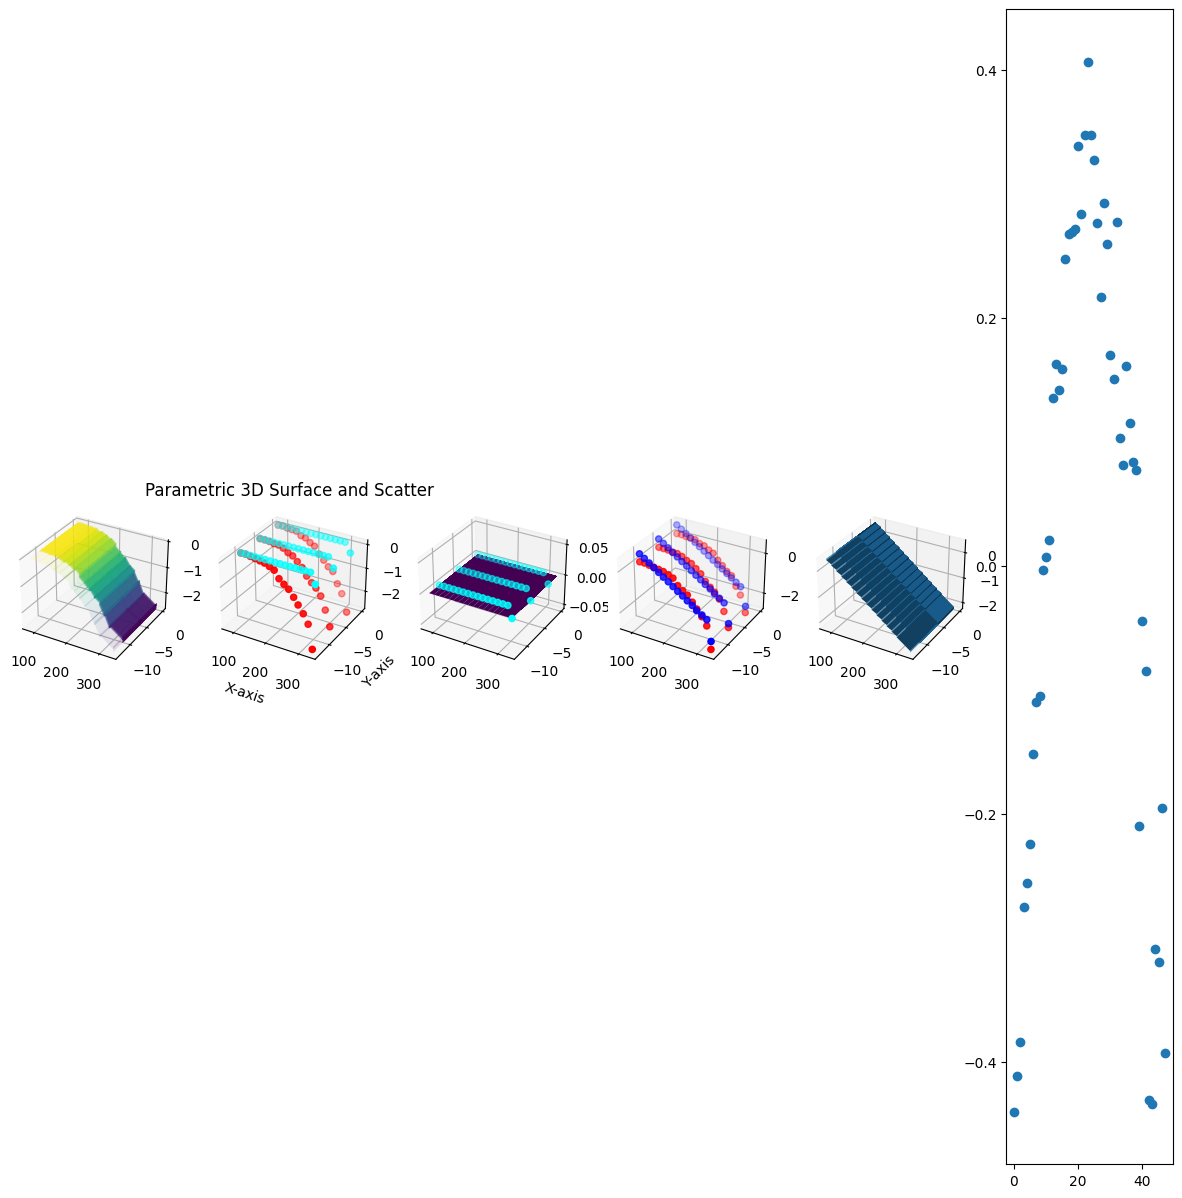

//////// ******************** ///////
Mse is :  0.0883410347468241
-0.7368781655205039 -0.7320635120621056 -0.024085497449805187
Formula : z = -0.7368781655205039+-0.7320635120621056x+-0.024085497449805187y


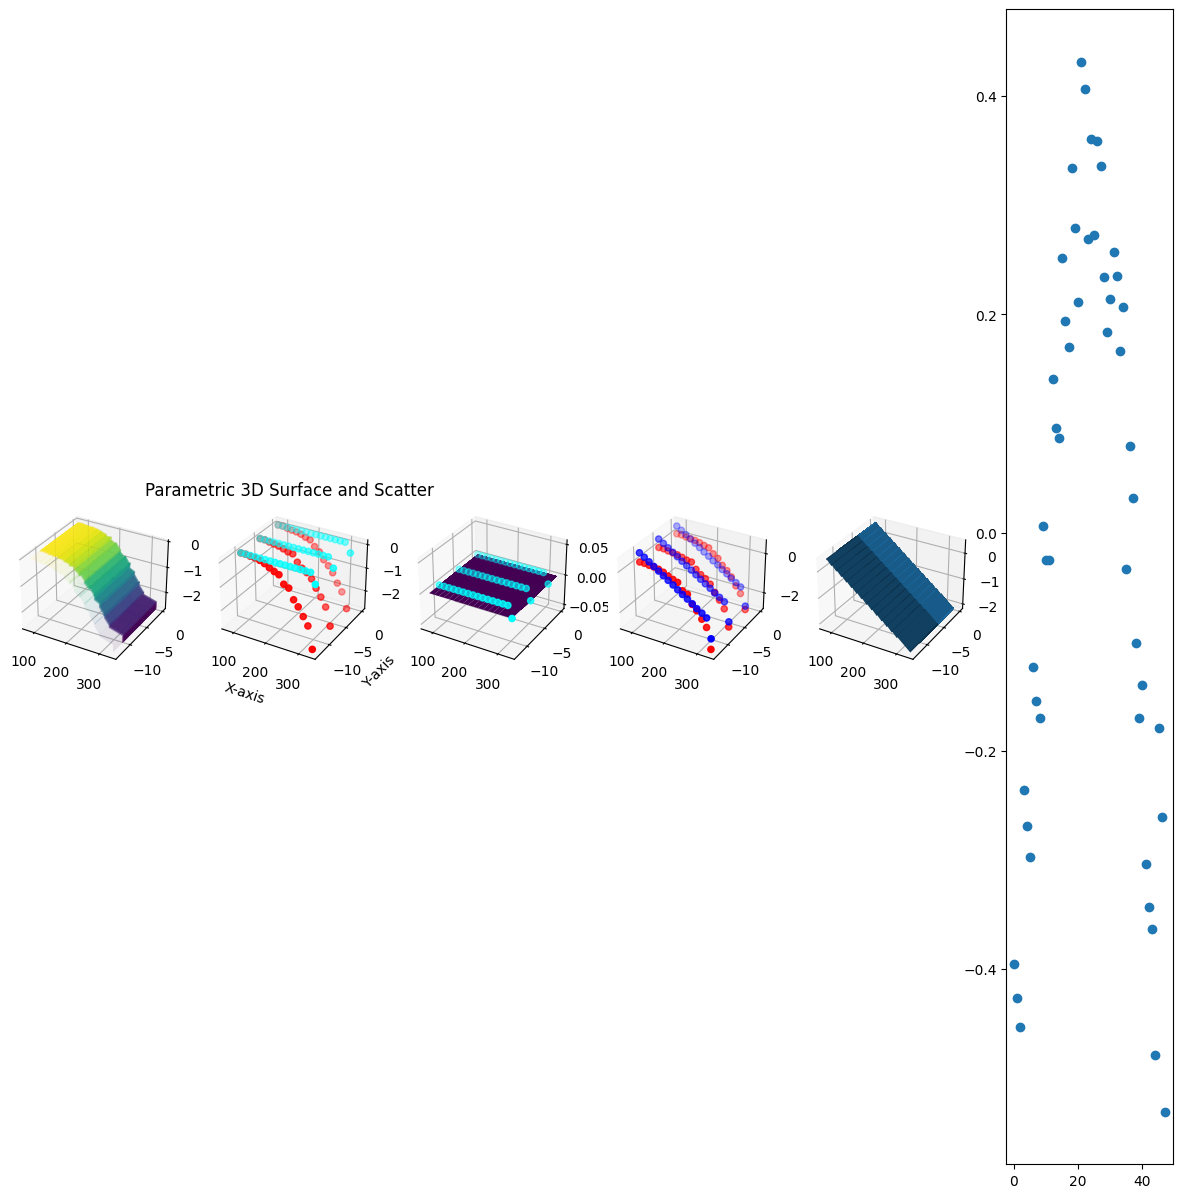

//////// ******************** ///////
Mse is :  0.09849519947351132
-0.8025776229814869 -0.7941775986391713 0.06436303500073125
Formula : z = -0.8025776229814869+-0.7941775986391713x+0.06436303500073125y


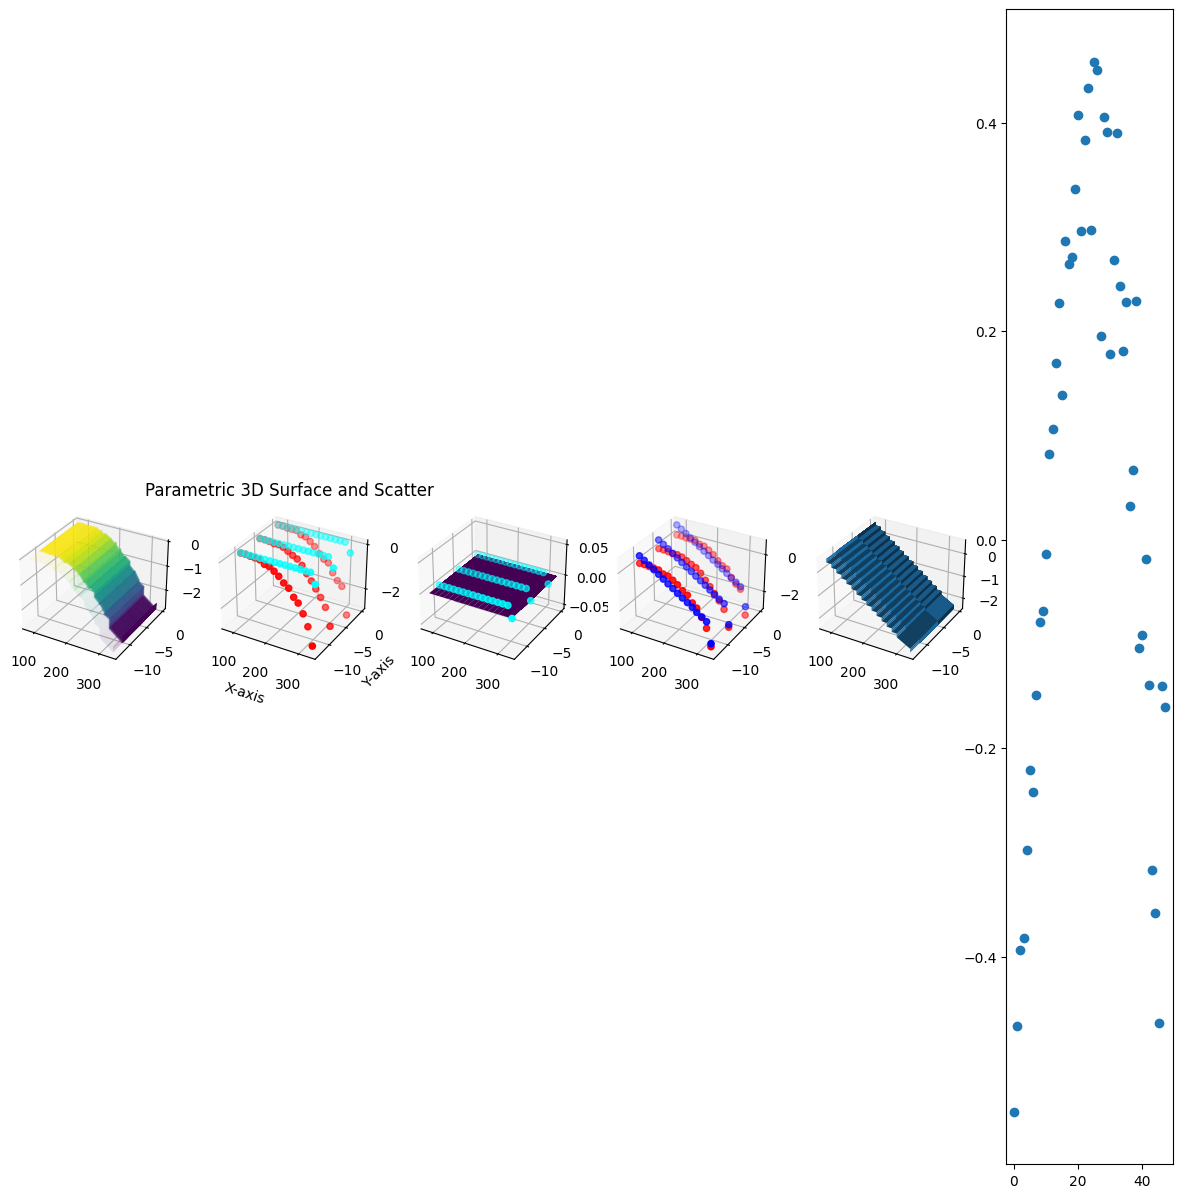

//////// ******************** ///////
Mse is :  0.09068207867530644
-0.7361218696286002 -0.7562267394679291 -0.033172144314940706
Formula : z = -0.7361218696286002+-0.7562267394679291x+-0.033172144314940706y


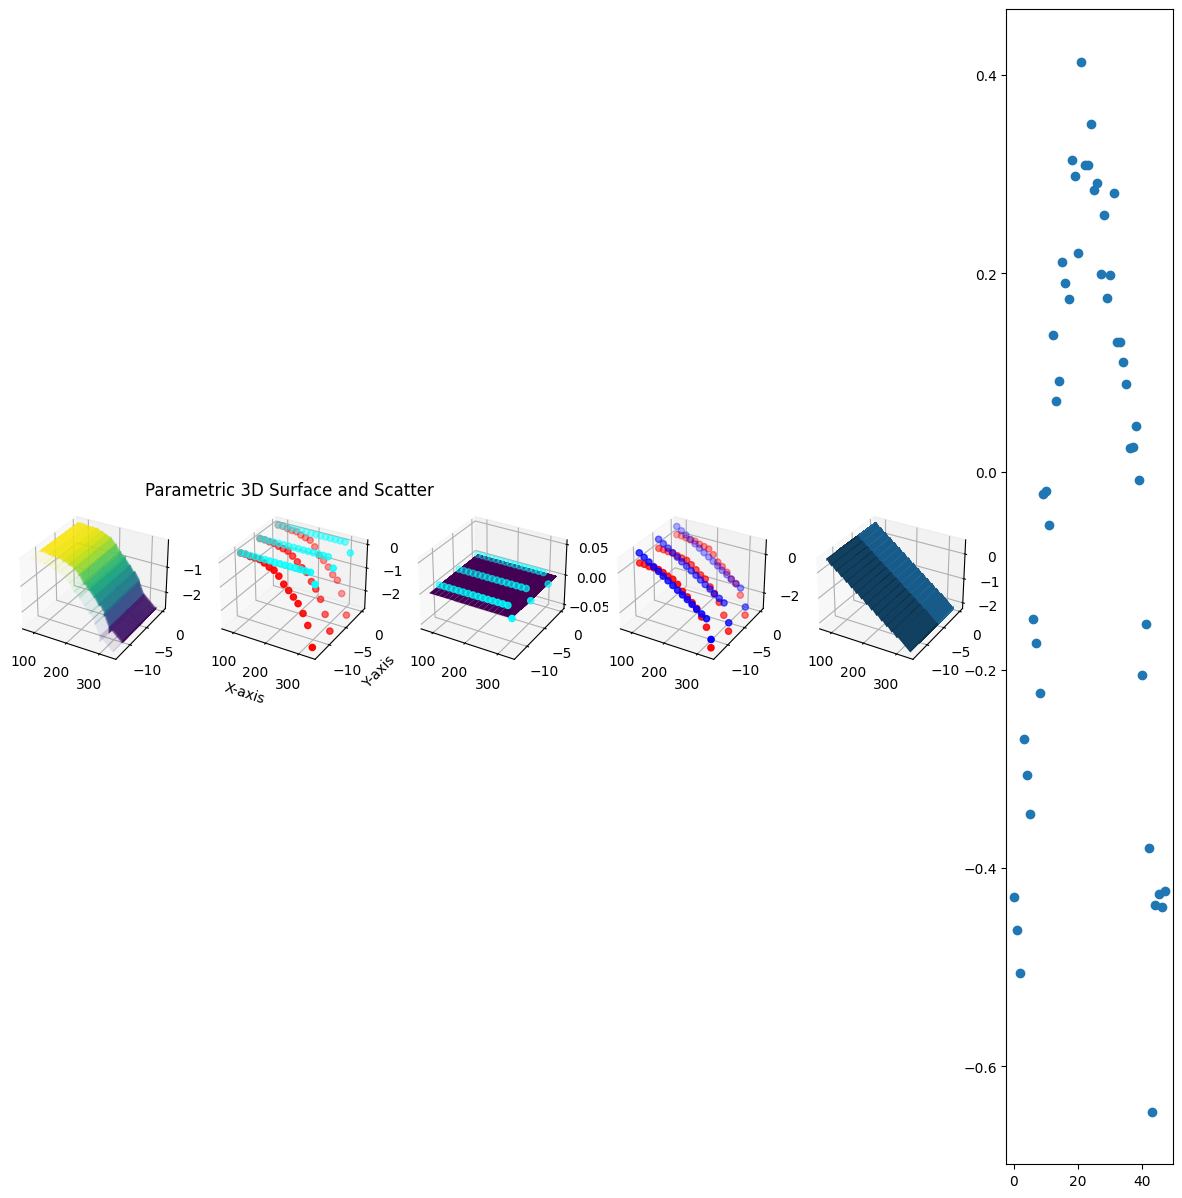

//////// ******************** ///////
Mse is :  0.07153948481208125
-0.7826957170490618 -0.727527947406331 -0.010838556383020262
Formula : z = -0.7826957170490618+-0.727527947406331x+-0.010838556383020262y


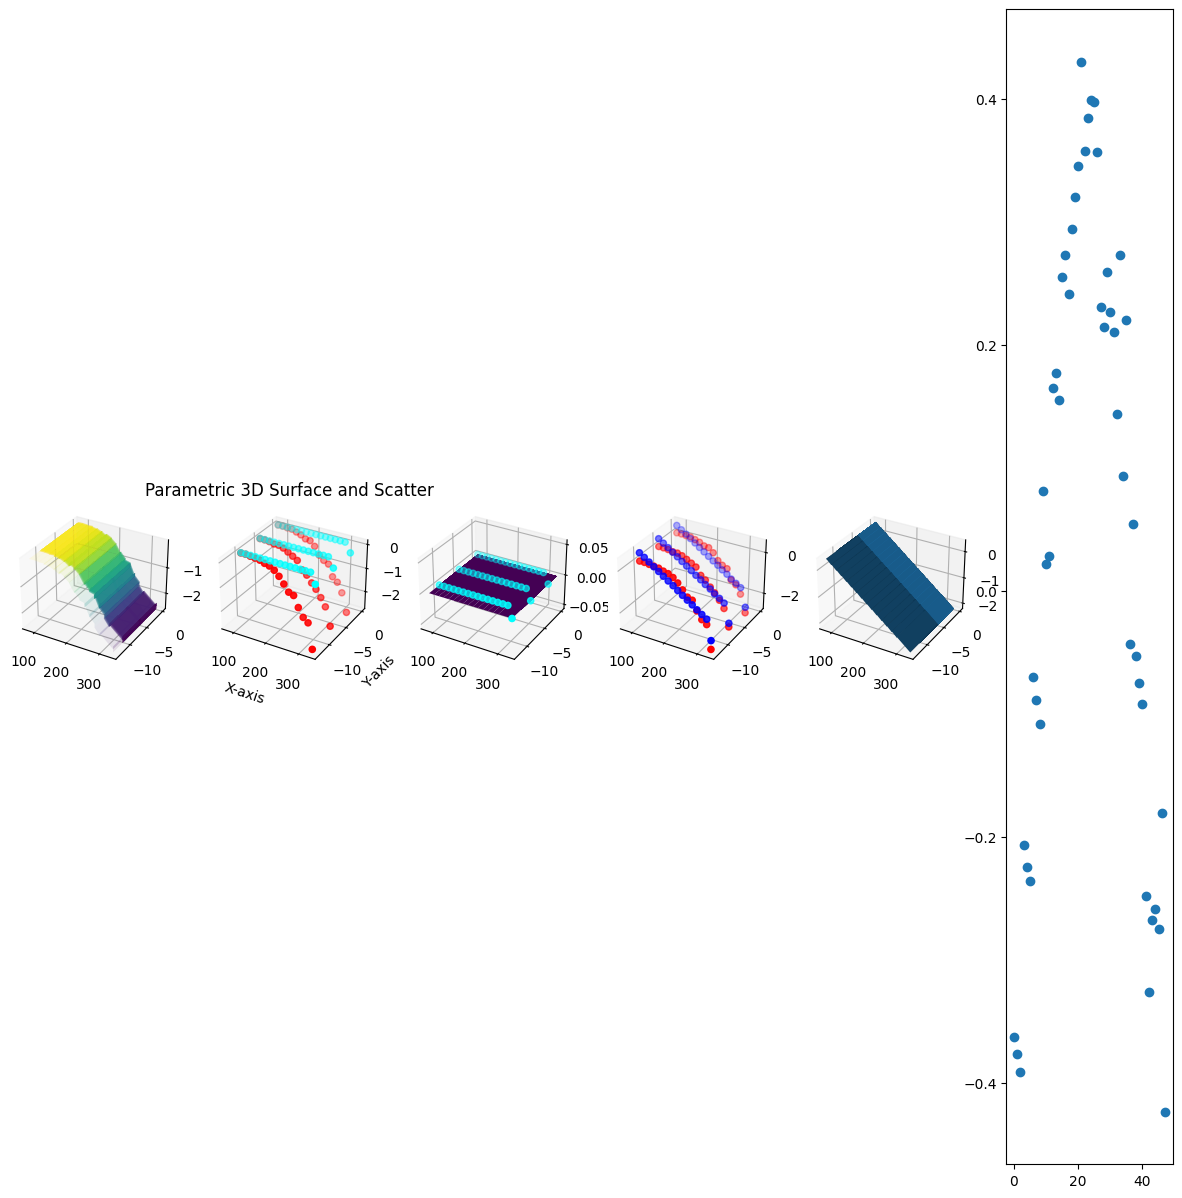

//////// ******************** ///////
Mse is :  0.09634210160282376
-0.7468044821260794 -0.7744386574359797 -0.051510923623914864
Formula : z = -0.7468044821260794+-0.7744386574359797x+-0.051510923623914864y


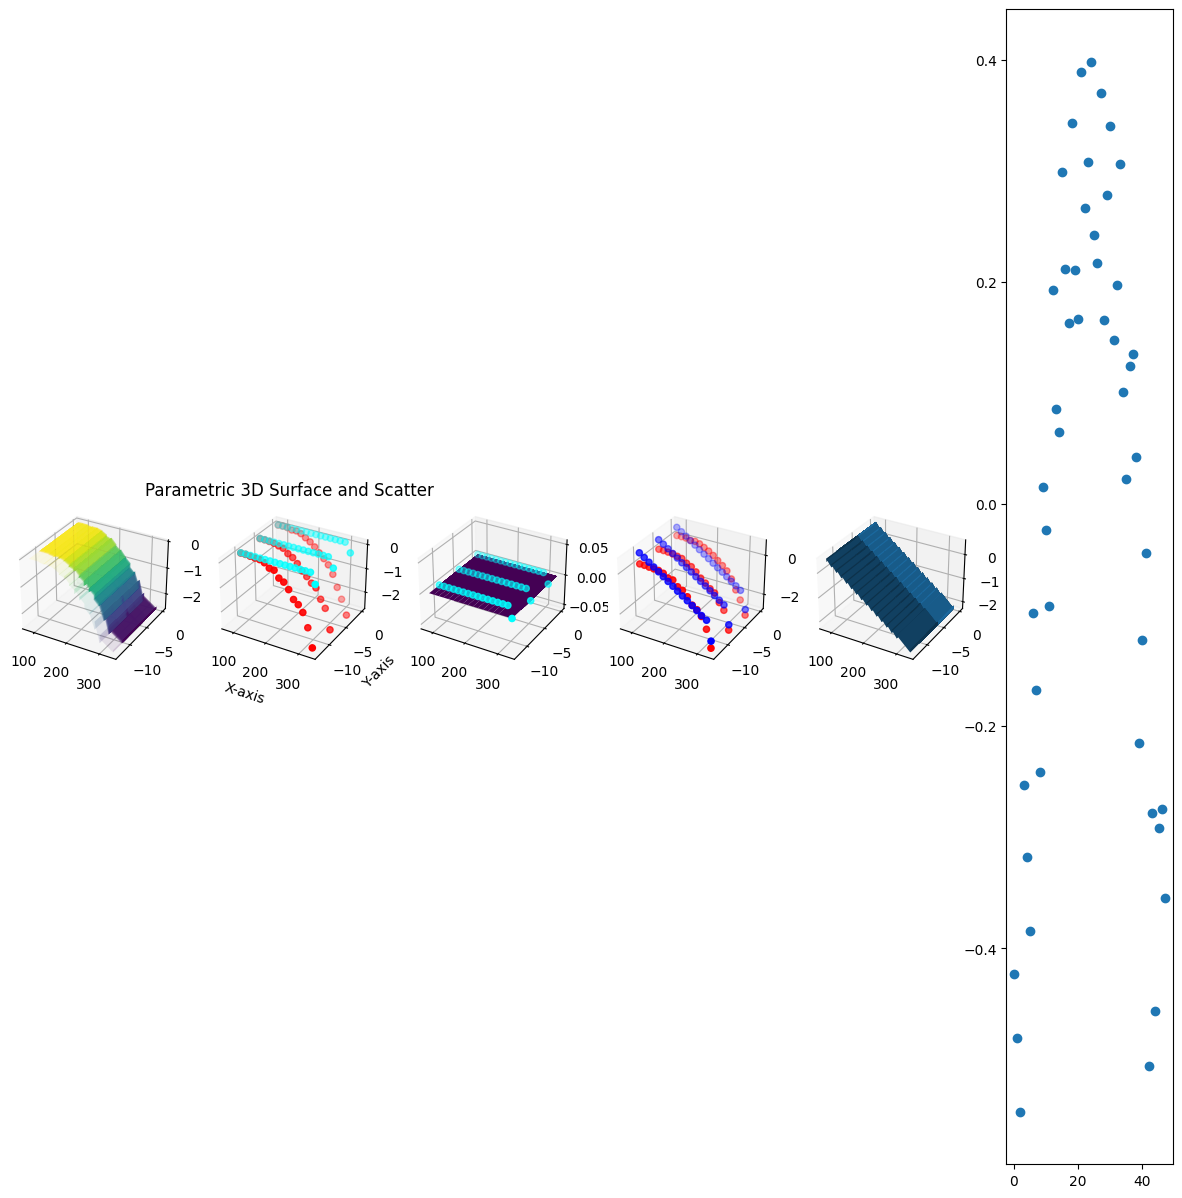

//////// ******************** ///////
Mse is :  0.08452397541529555
-0.740045446984353 -0.7874511276027377 -0.0037392778517995723
Formula : z = -0.740045446984353+-0.7874511276027377x+-0.0037392778517995723y


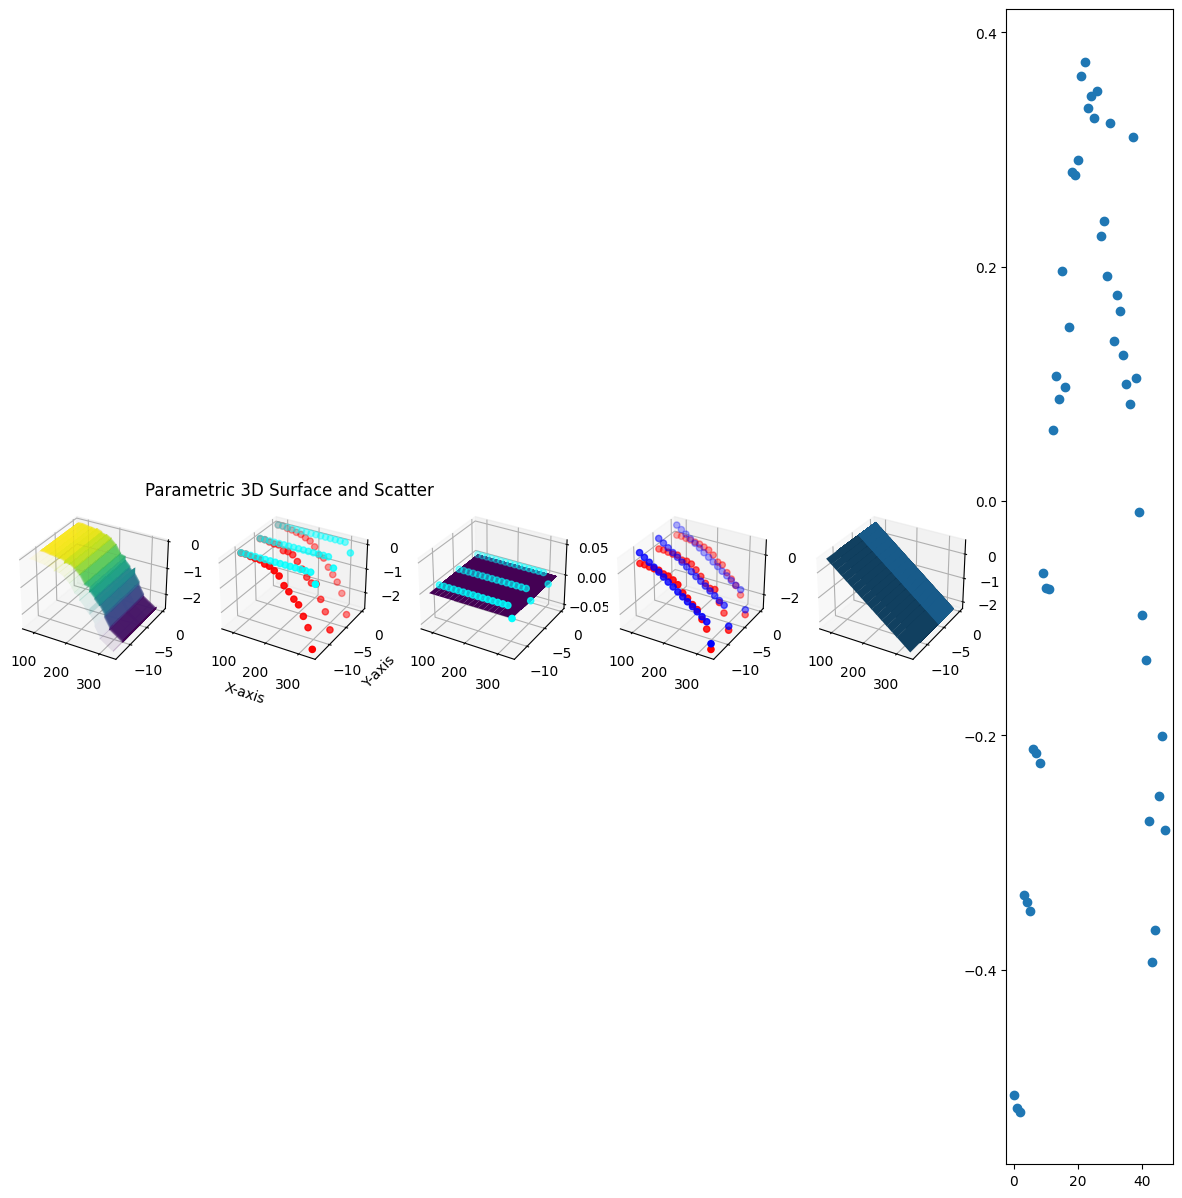

//////// ******************** ///////
Mse is :  0.07174018338289205
-0.7335328007331958 -0.7196672669139039 0.008998573948485591
Formula : z = -0.7335328007331958+-0.7196672669139039x+0.008998573948485591y


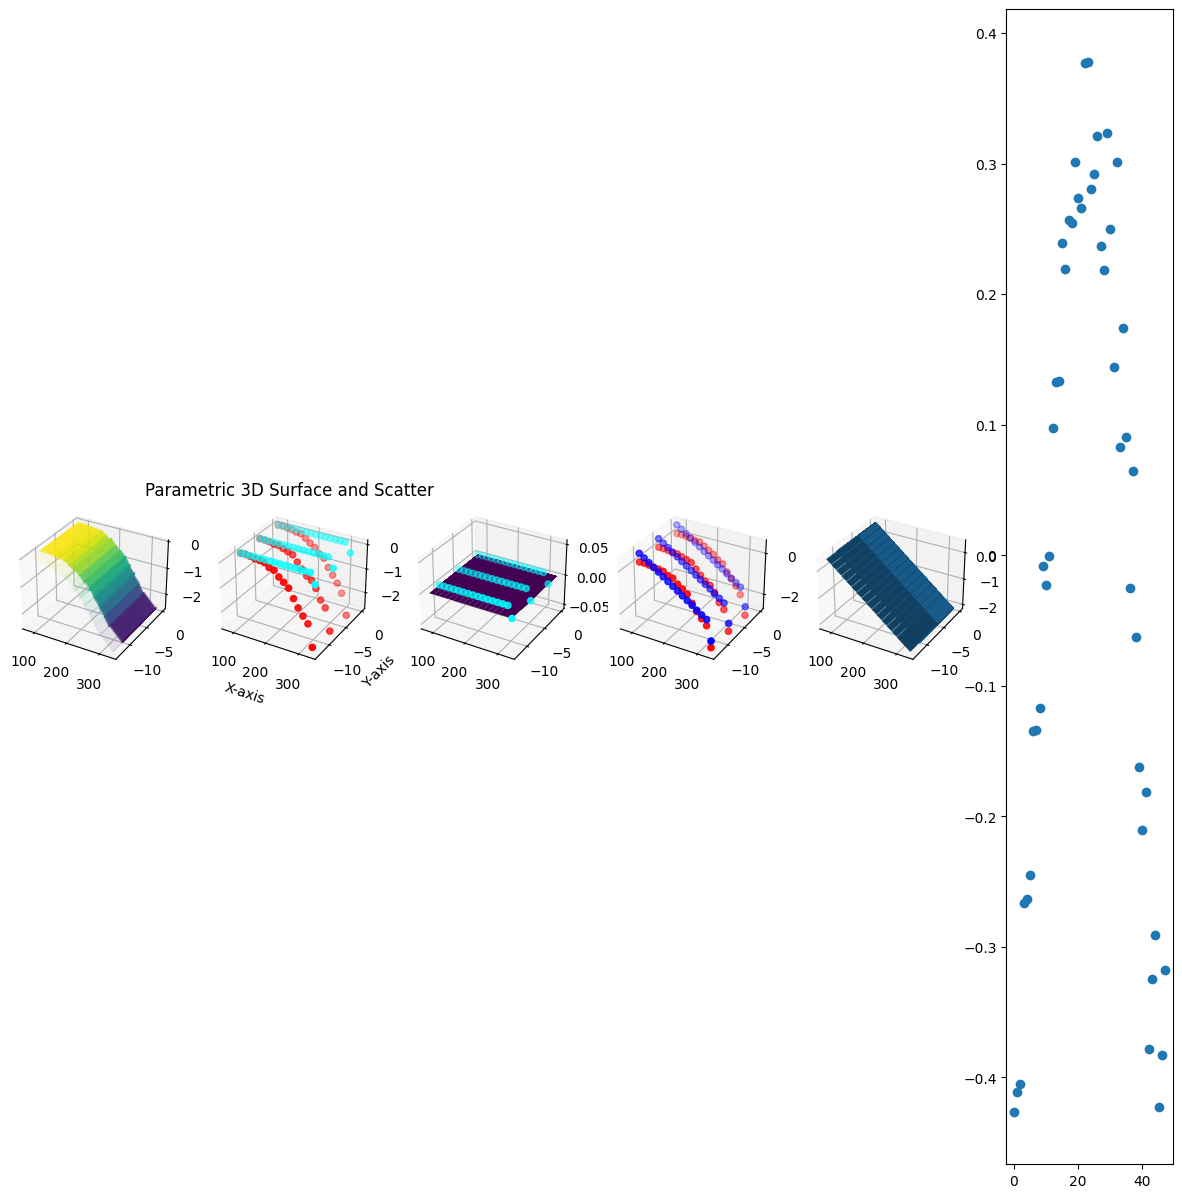

//////// ******************** ///////
Mse is :  0.0921446099290411
-0.7363542682255798 -0.7577153201574951 0.017542672086017883
Formula : z = -0.7363542682255798+-0.7577153201574951x+0.017542672086017883y


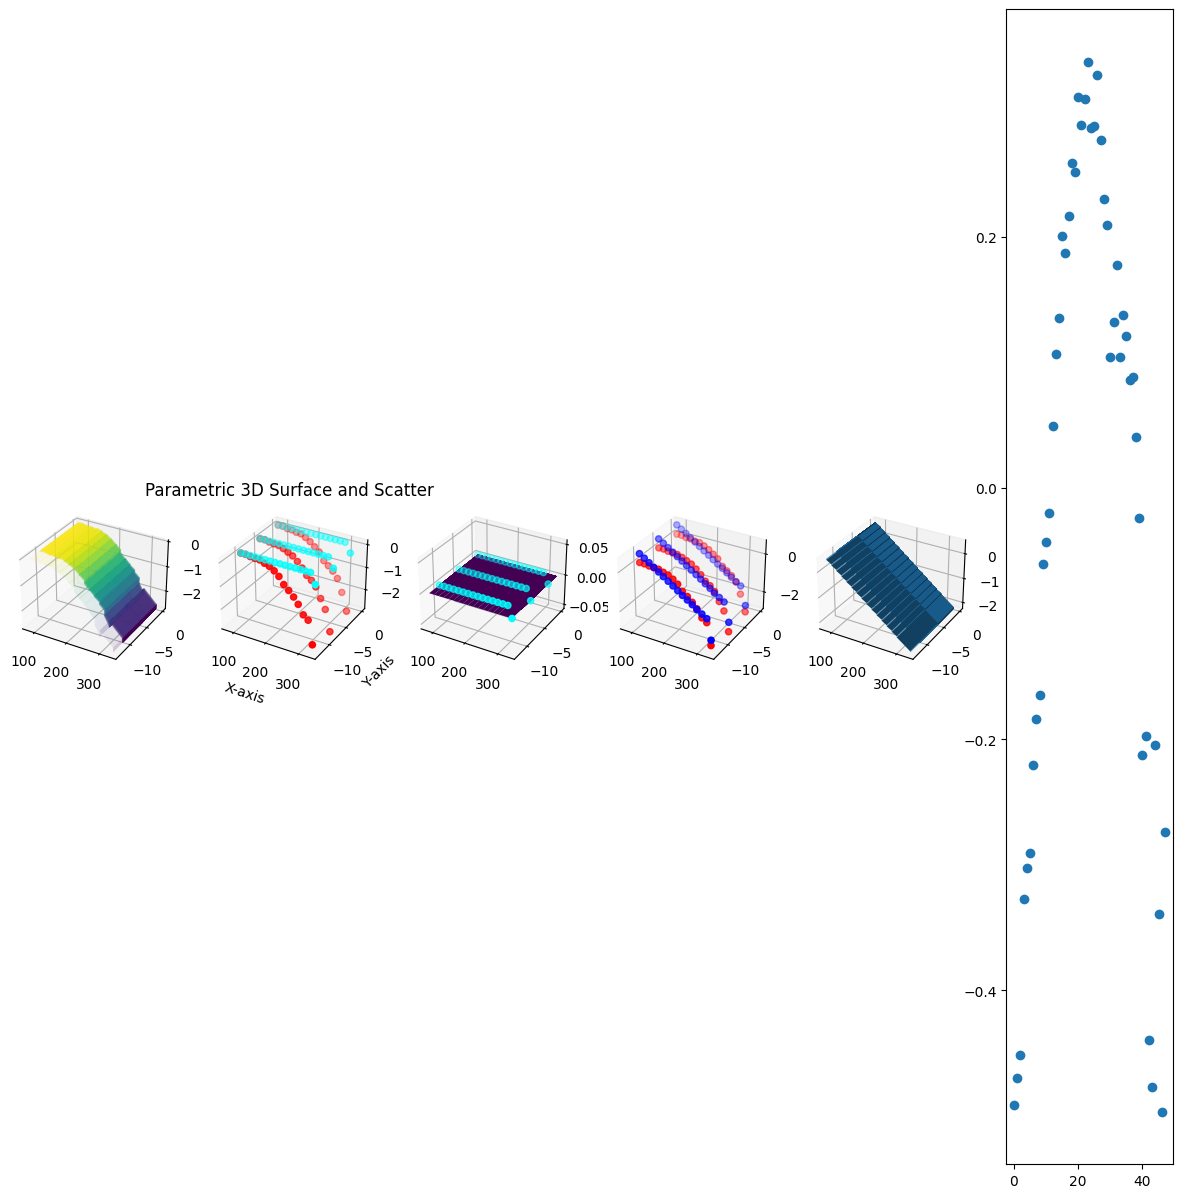

//////// ******************** ///////
Mse is :  0.10374406177812594
-0.731065188520098 -0.7305611081492102 -0.0412974642902419
Formula : z = -0.731065188520098+-0.7305611081492102x+-0.0412974642902419y


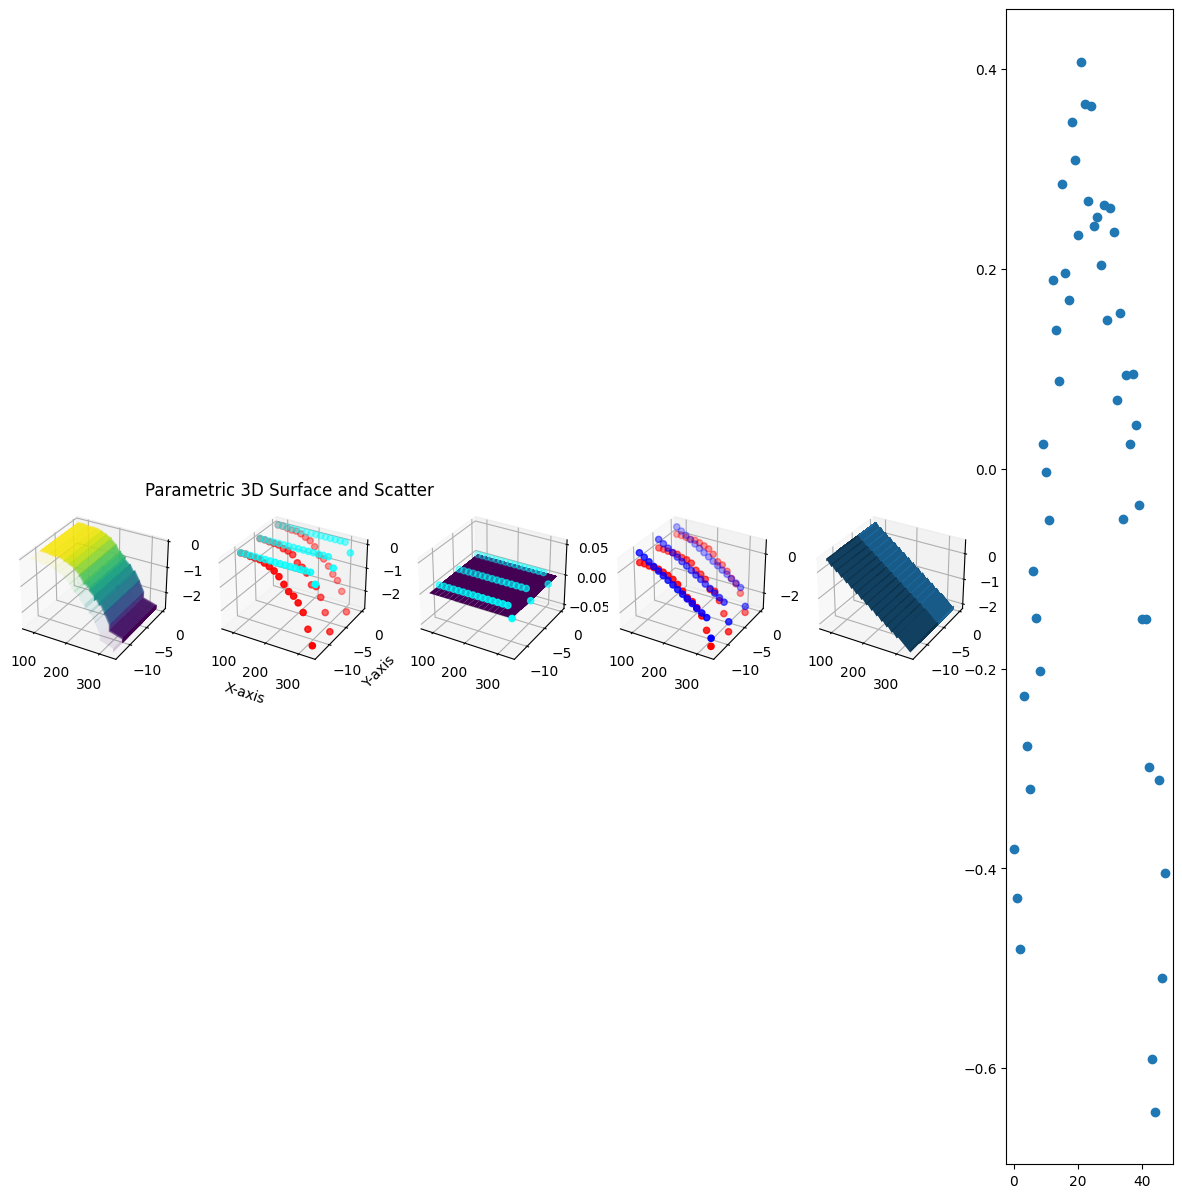

//////// ******************** ///////
Mse is :  0.09395048832601732
-0.722521835100342 -0.7656437634576367 0.05058273144968734
Formula : z = -0.722521835100342+-0.7656437634576367x+0.05058273144968734y


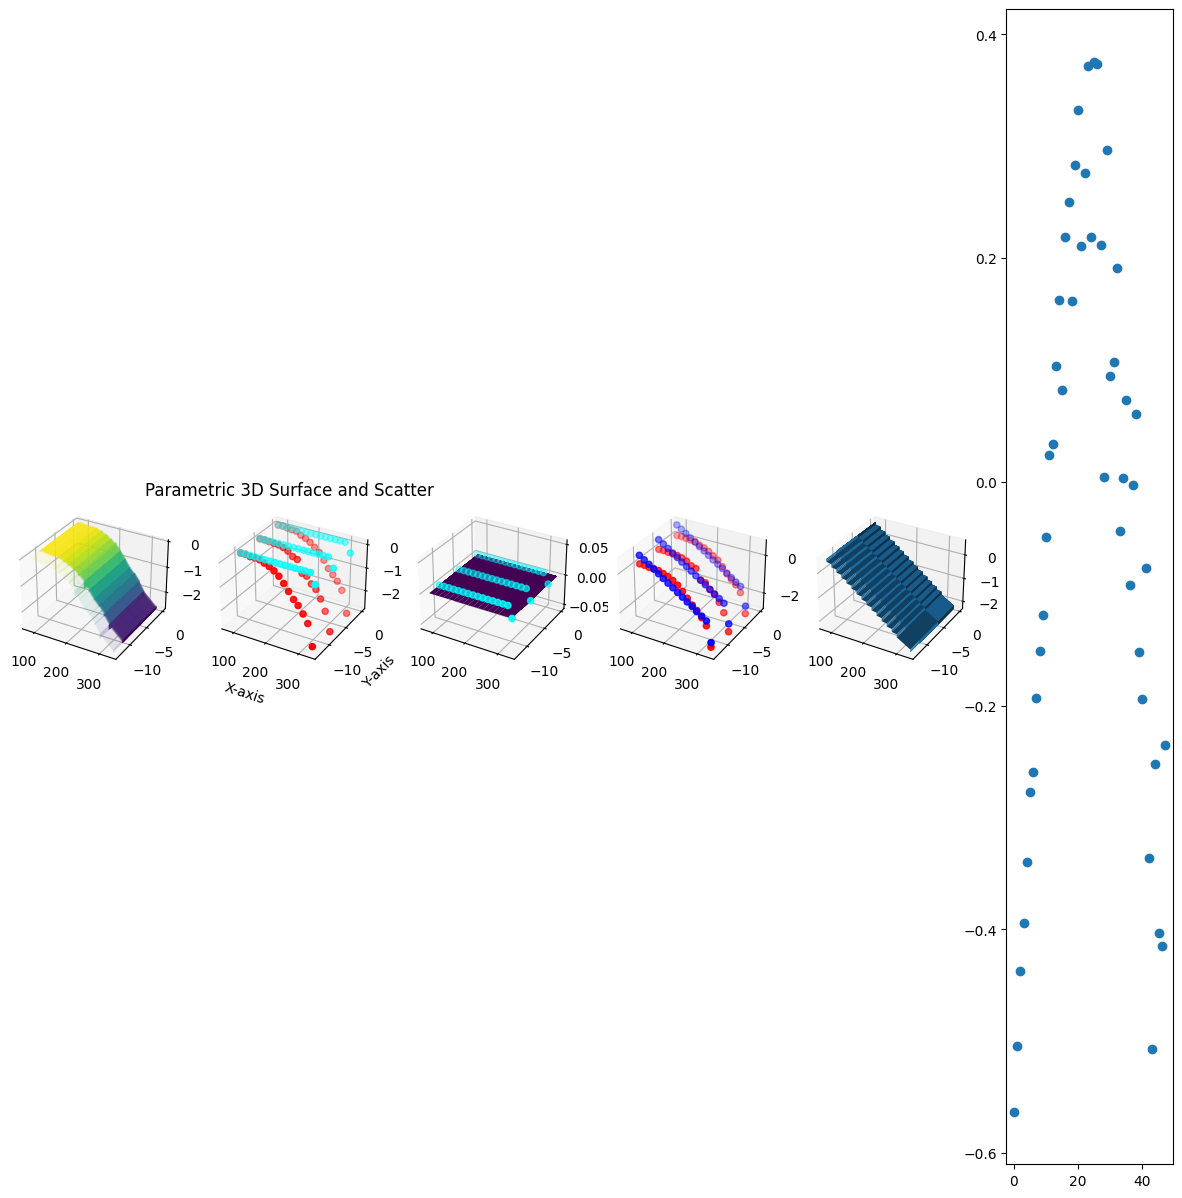

//////// ******************** ///////
Mse is :  0.049218846033967305
-0.7187137574416018 -0.7470071710458186 0.03231959593891561
Formula : z = -0.7187137574416018+-0.7470071710458186x+0.03231959593891561y


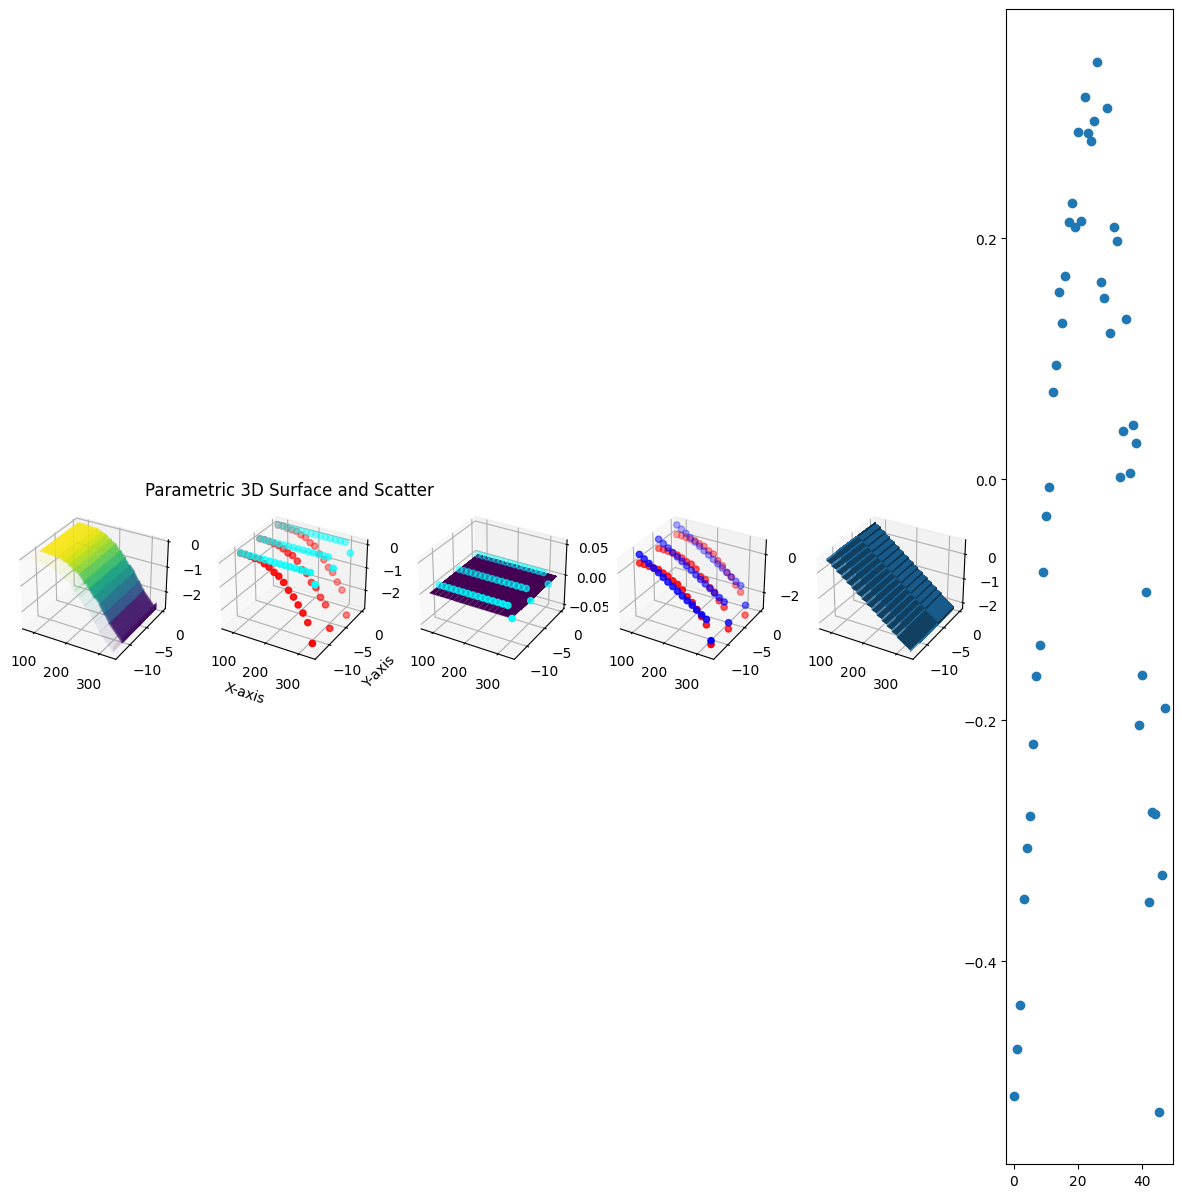

//////// ******************** ///////
Mse is :  0.13594809328908472
-0.7292463528452681 -0.8223789715325648 -0.0329359390865645
Formula : z = -0.7292463528452681+-0.8223789715325648x+-0.0329359390865645y


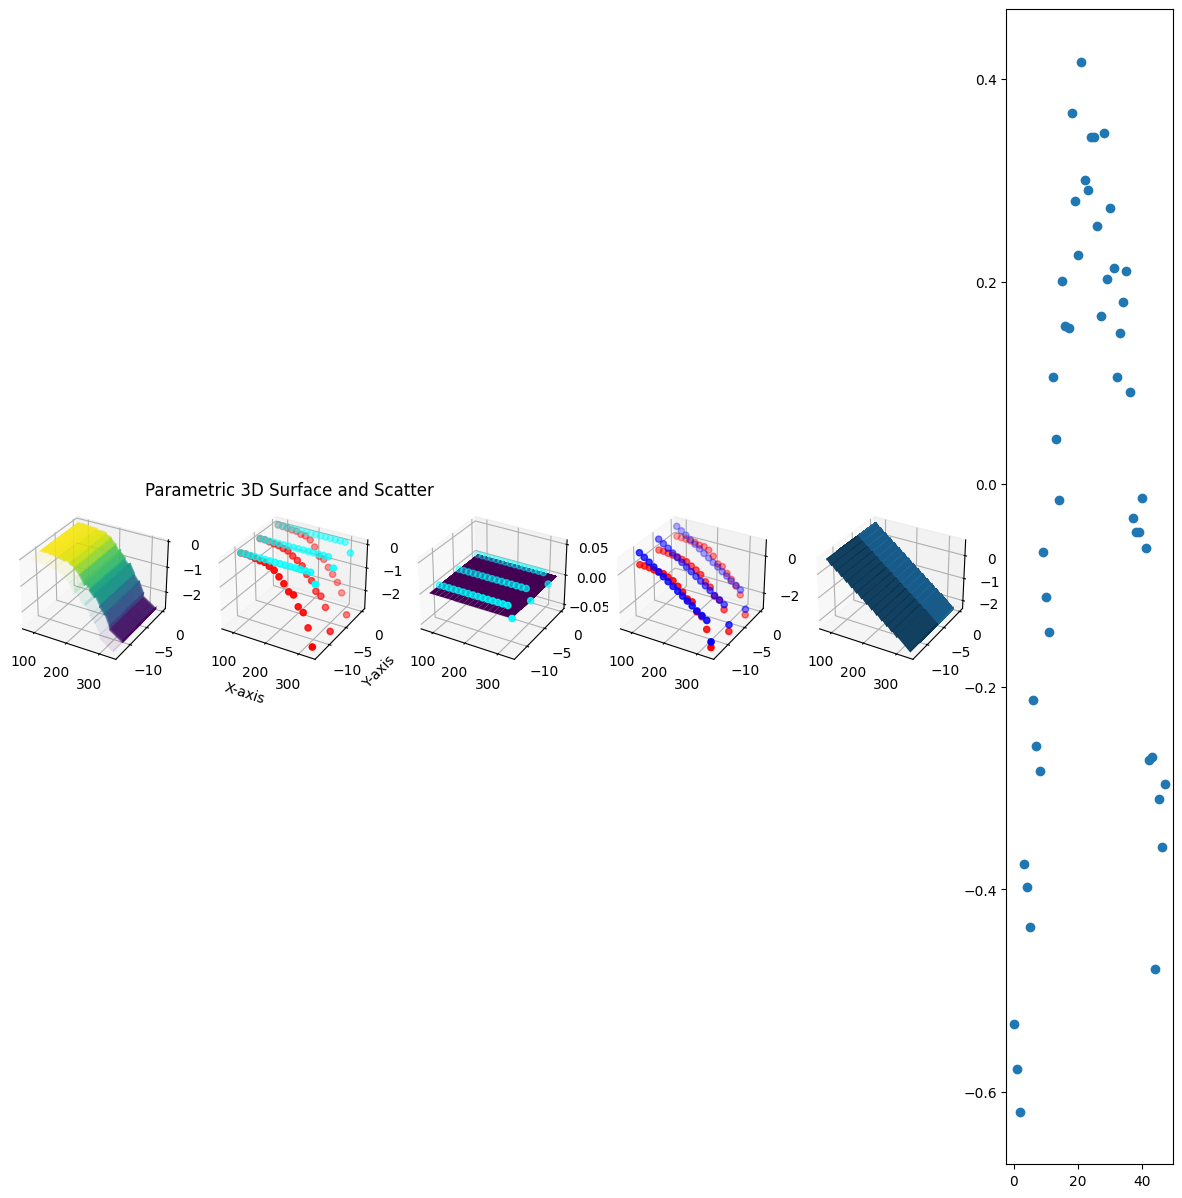

//////// ******************** ///////
Mse is :  0.08799273845073624
-0.7557544044992427 -0.7577243731205339 0.009250656932432915
Formula : z = -0.7557544044992427+-0.7577243731205339x+0.009250656932432915y


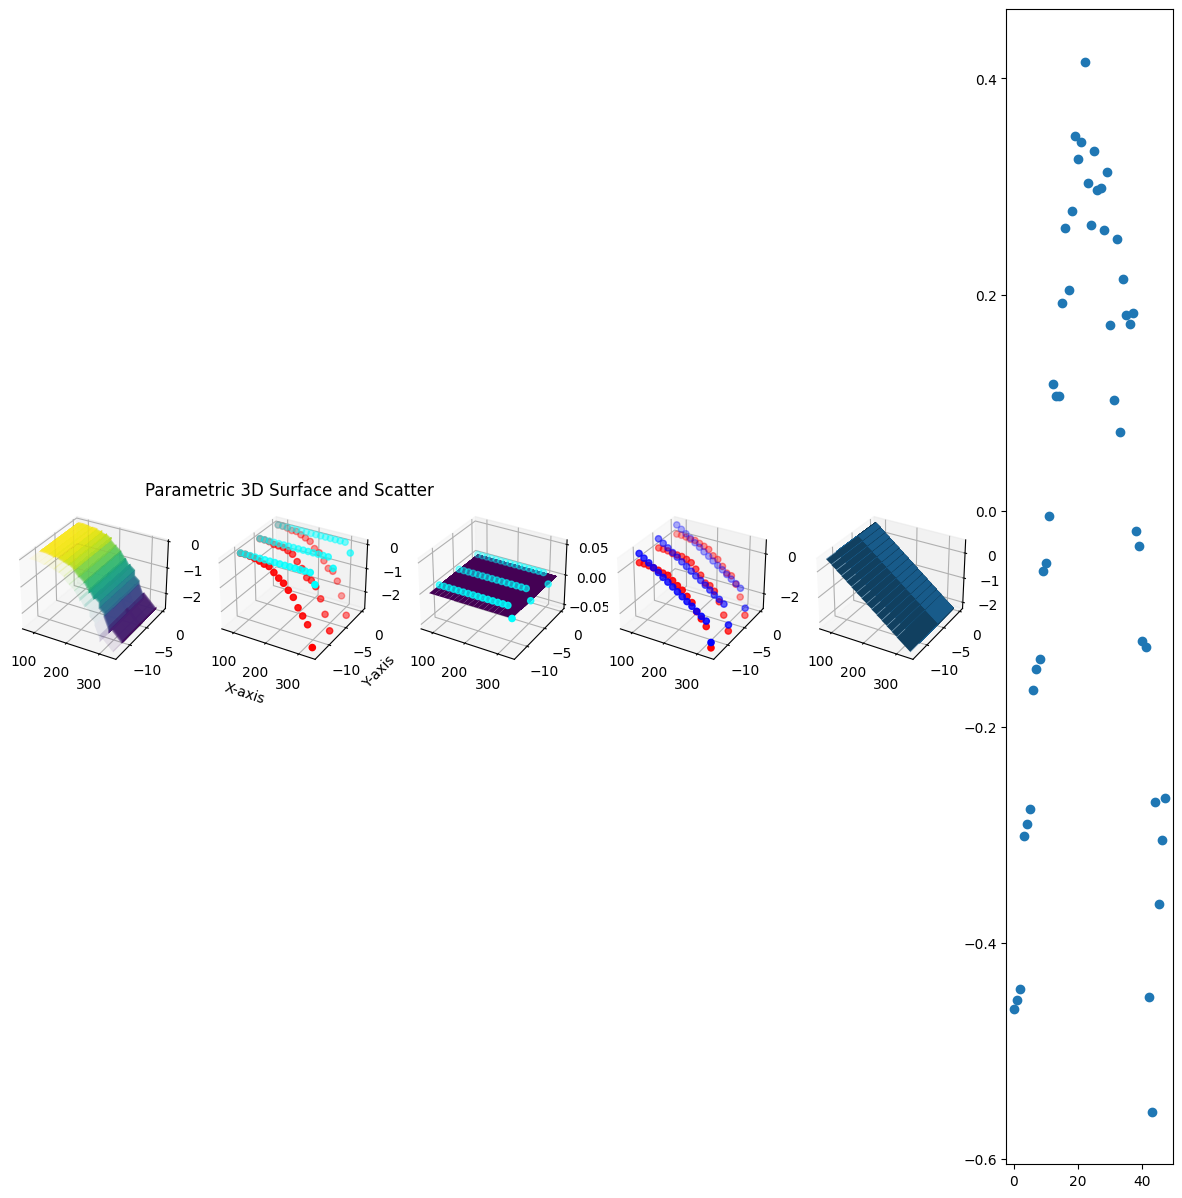

//////// ******************** ///////
Mse is :  0.09693112465538622
-0.7299649020657608 -0.702257629618917 0.010383533356014078
Formula : z = -0.7299649020657608+-0.702257629618917x+0.010383533356014078y


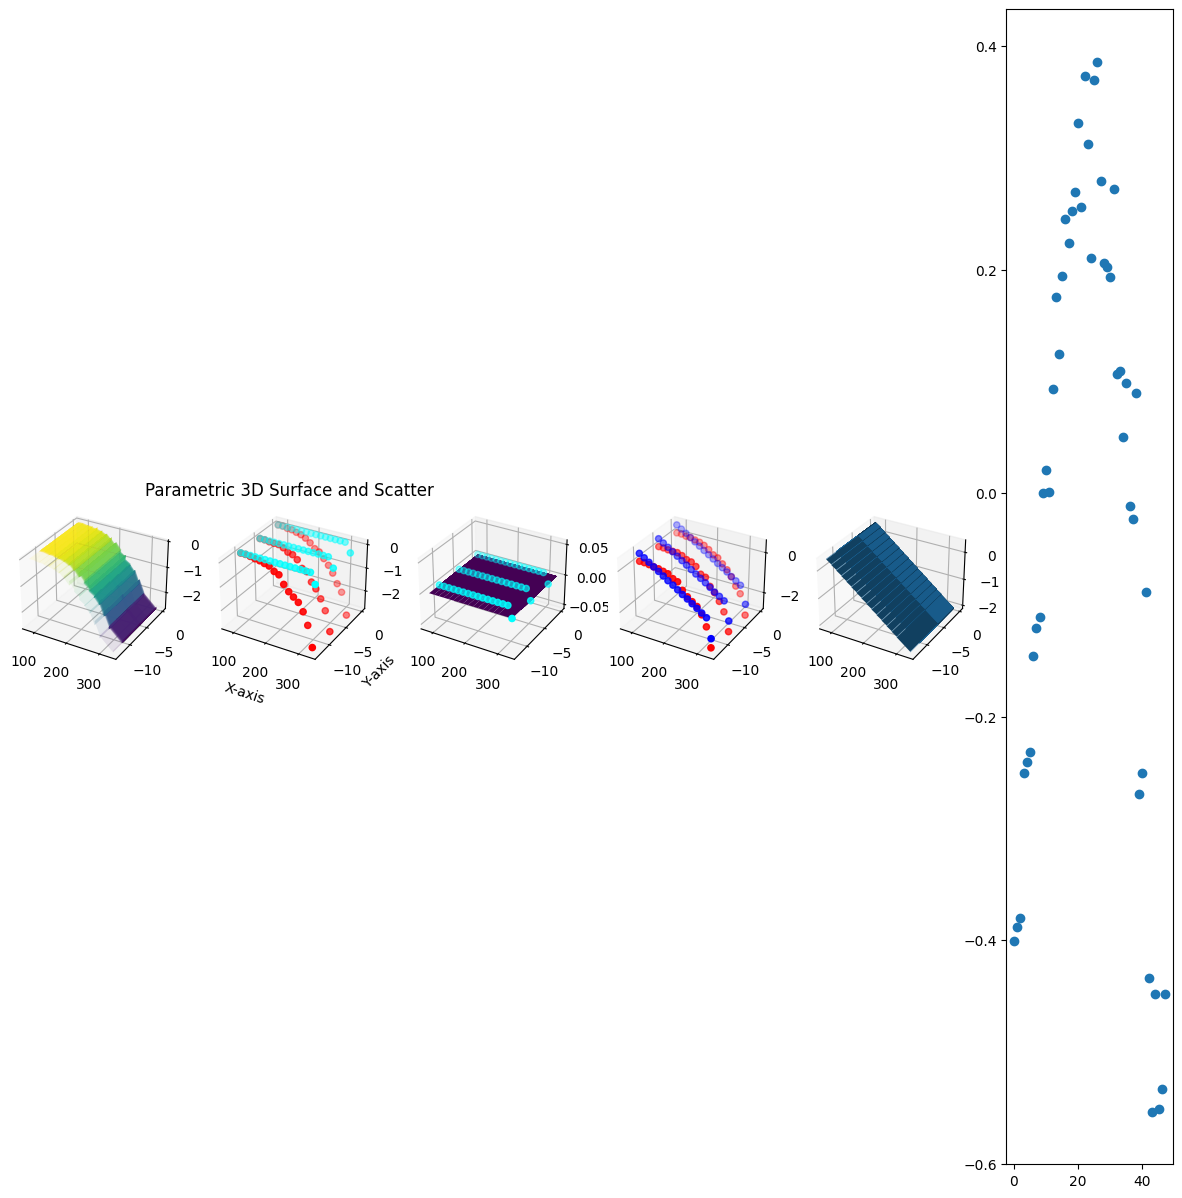

//////// ******************** ///////
Mse is :  0.08270168315675754
-0.7114904748840378 -0.7163401609069934 0.021122009799166574
Formula : z = -0.7114904748840378+-0.7163401609069934x+0.021122009799166574y


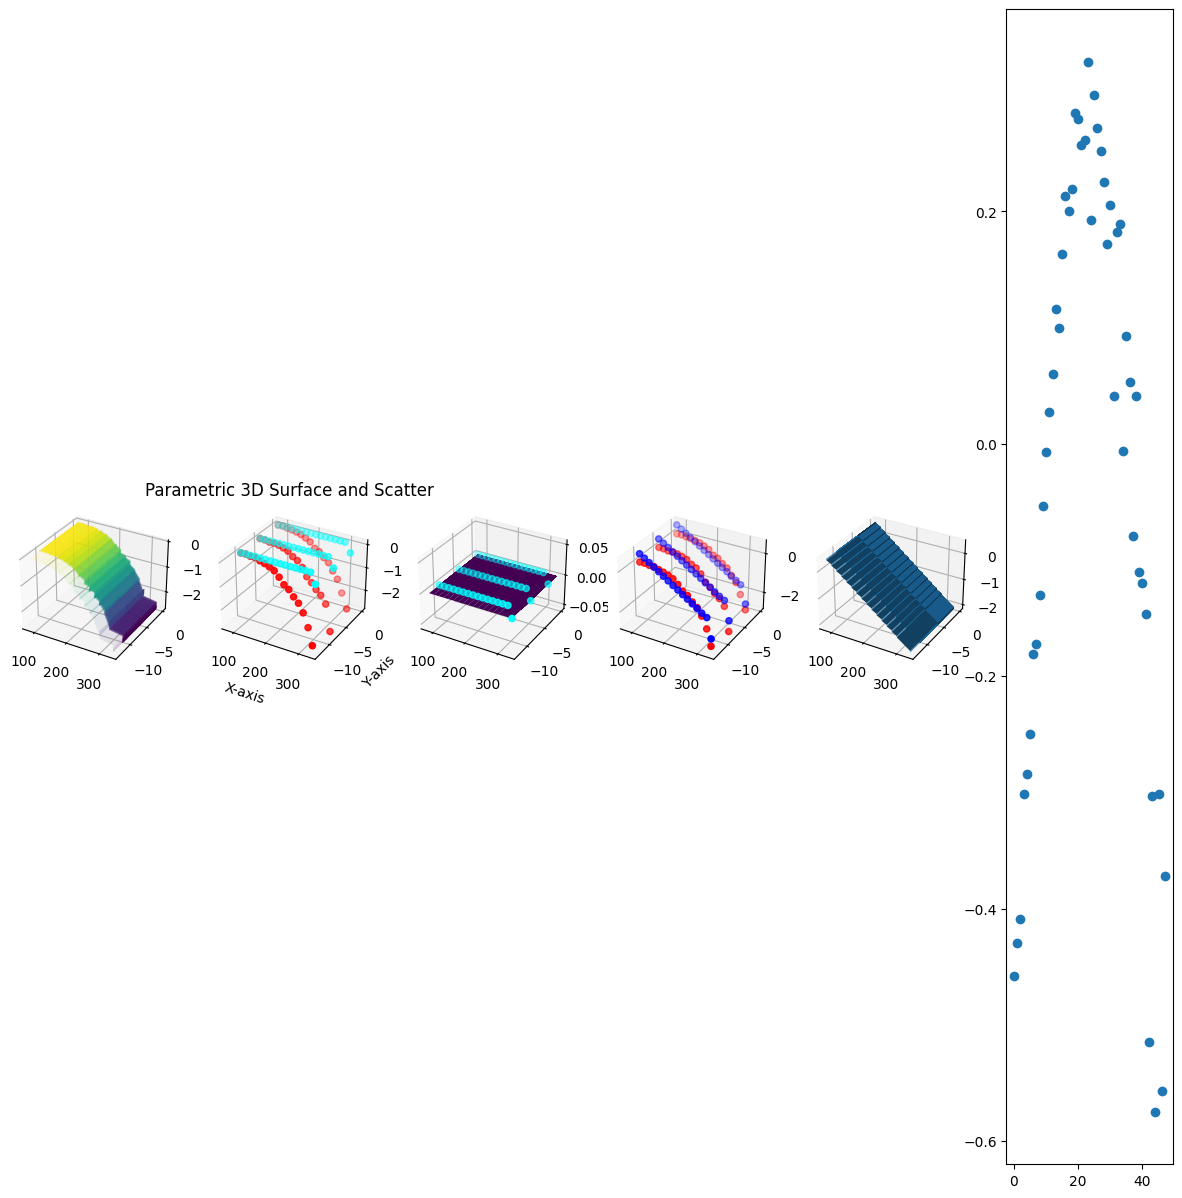

//////// ******************** ///////
Mse is :  0.08517851794974111
-0.7286038968301757 -0.7640866135459118 -0.021566111910346887
Formula : z = -0.7286038968301757+-0.7640866135459118x+-0.021566111910346887y


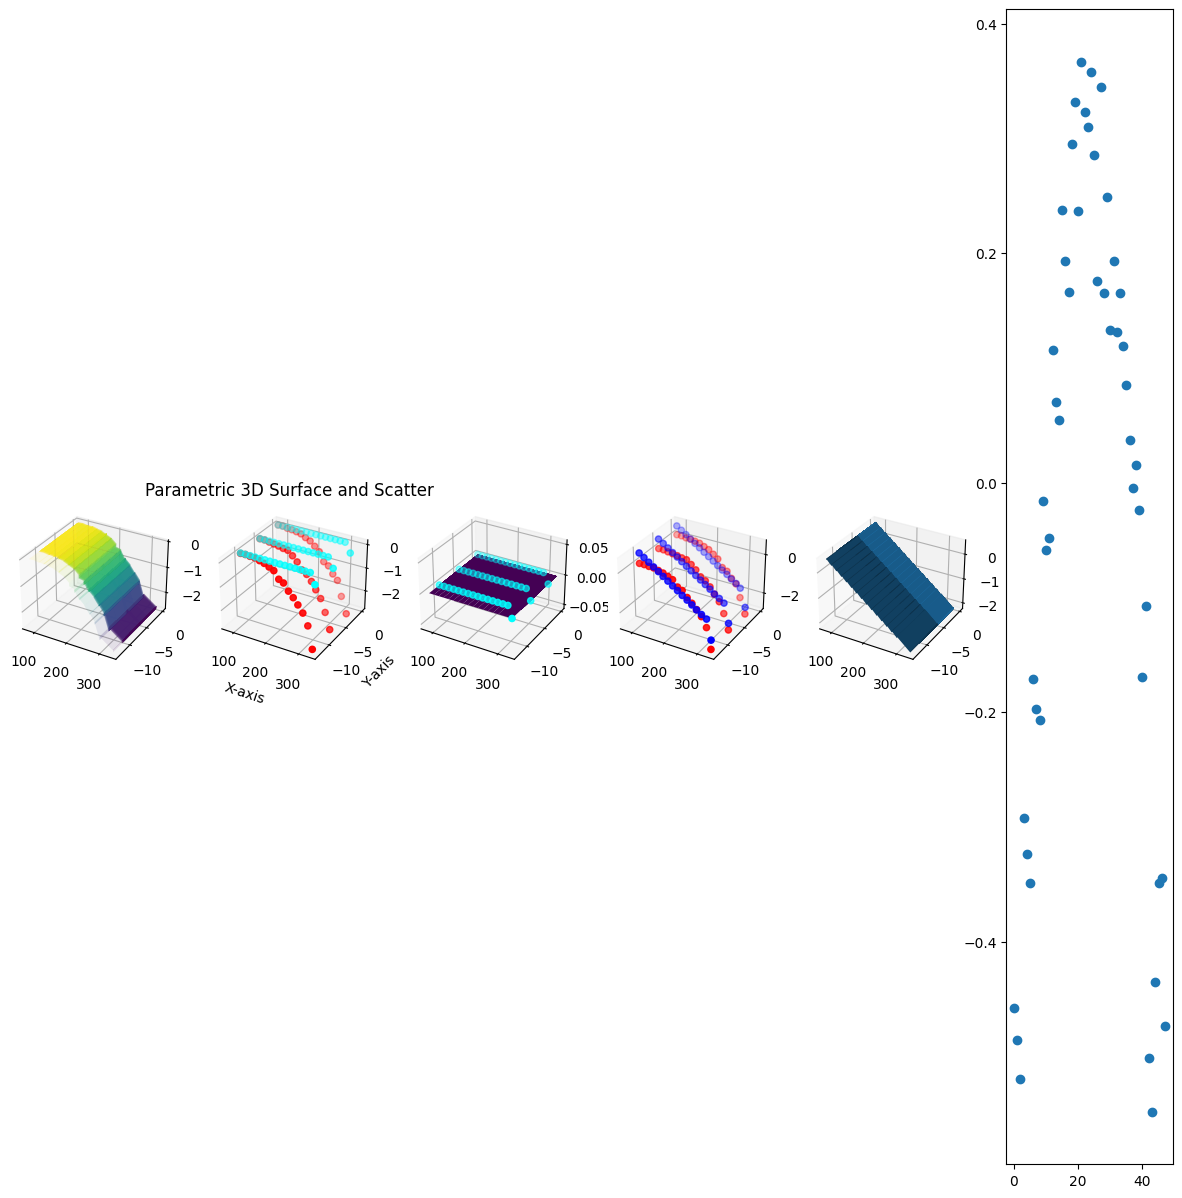

//////// ******************** ///////
Mse is :  0.08390650630184737
-0.7216799525120874 -0.764929242159718 -0.022140329813905686
Formula : z = -0.7216799525120874+-0.764929242159718x+-0.022140329813905686y


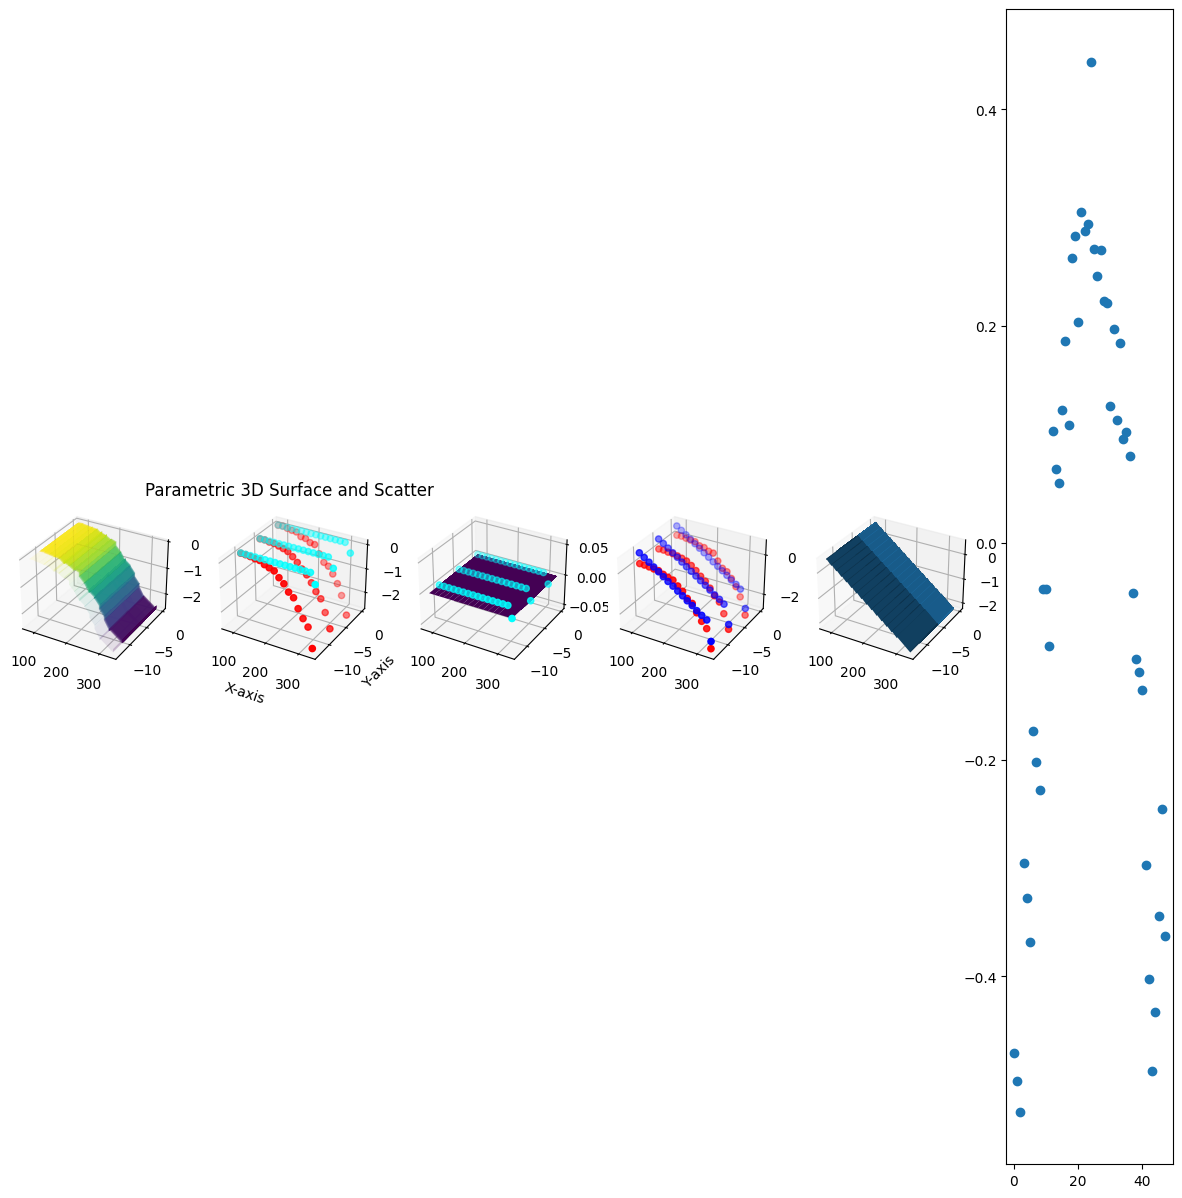

//////// ******************** ///////
Mse is :  0.06838534764190825
-0.7516364690904848 -0.7614789938009661 0.01660405063307135
Formula : z = -0.7516364690904848+-0.7614789938009661x+0.01660405063307135y


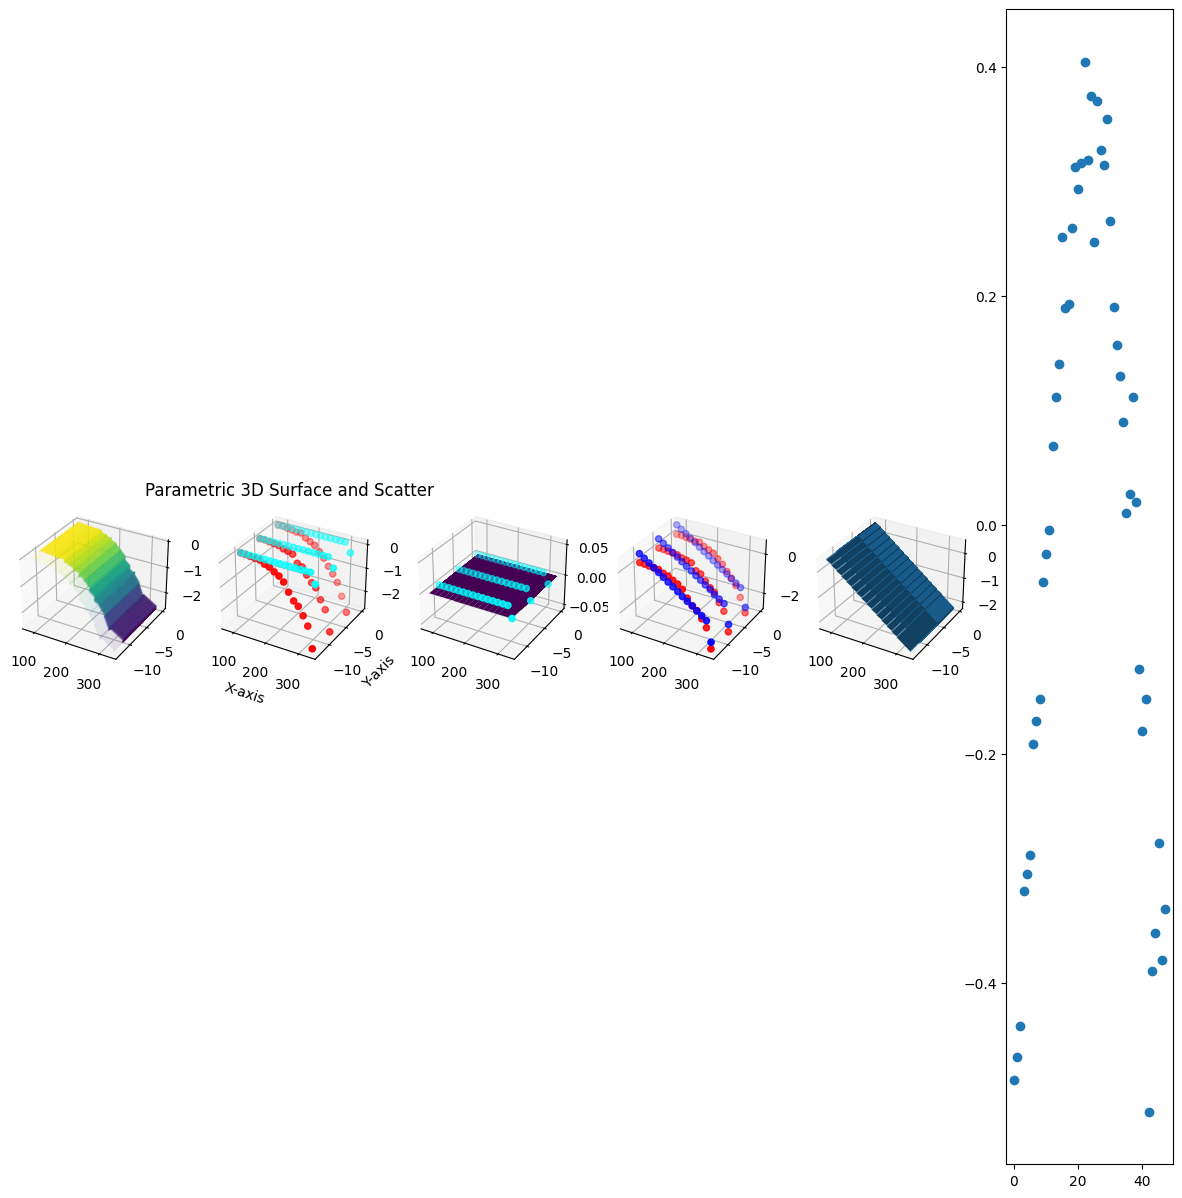

//////// ******************** ///////
Mse is :  0.10277430082271886
-0.7200279635890179 -0.8188749068264874 0.005452059144792123
Formula : z = -0.7200279635890179+-0.8188749068264874x+0.005452059144792123y


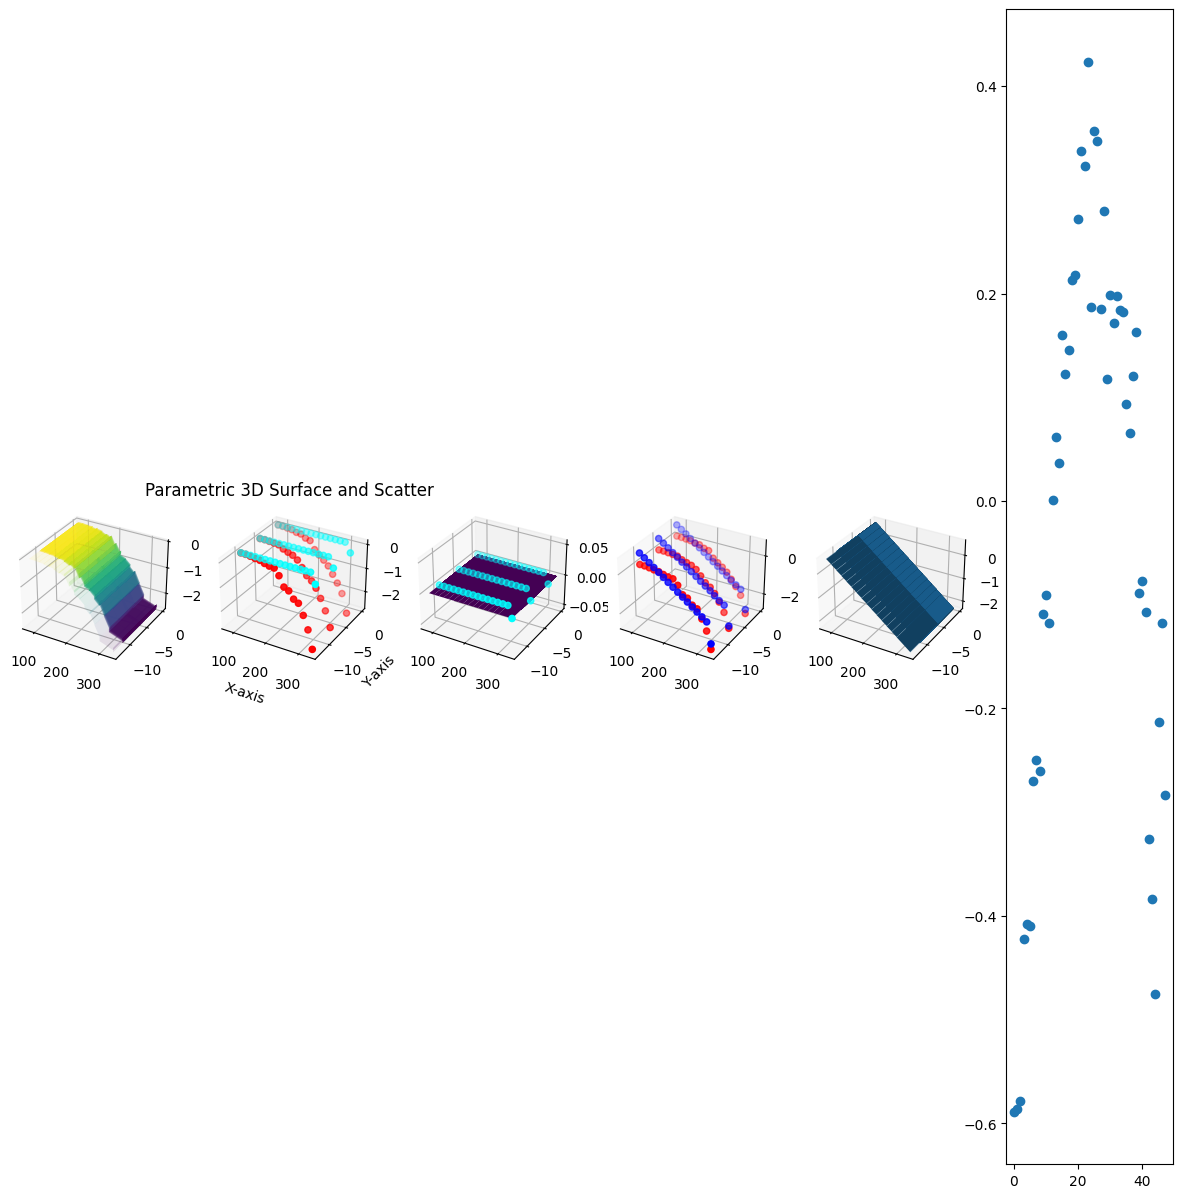

//////// ******************** ///////
Mse is :  0.05321036344213189
-0.7398918608823996 -0.7540568753462633 0.03904883043864914
Formula : z = -0.7398918608823996+-0.7540568753462633x+0.03904883043864914y


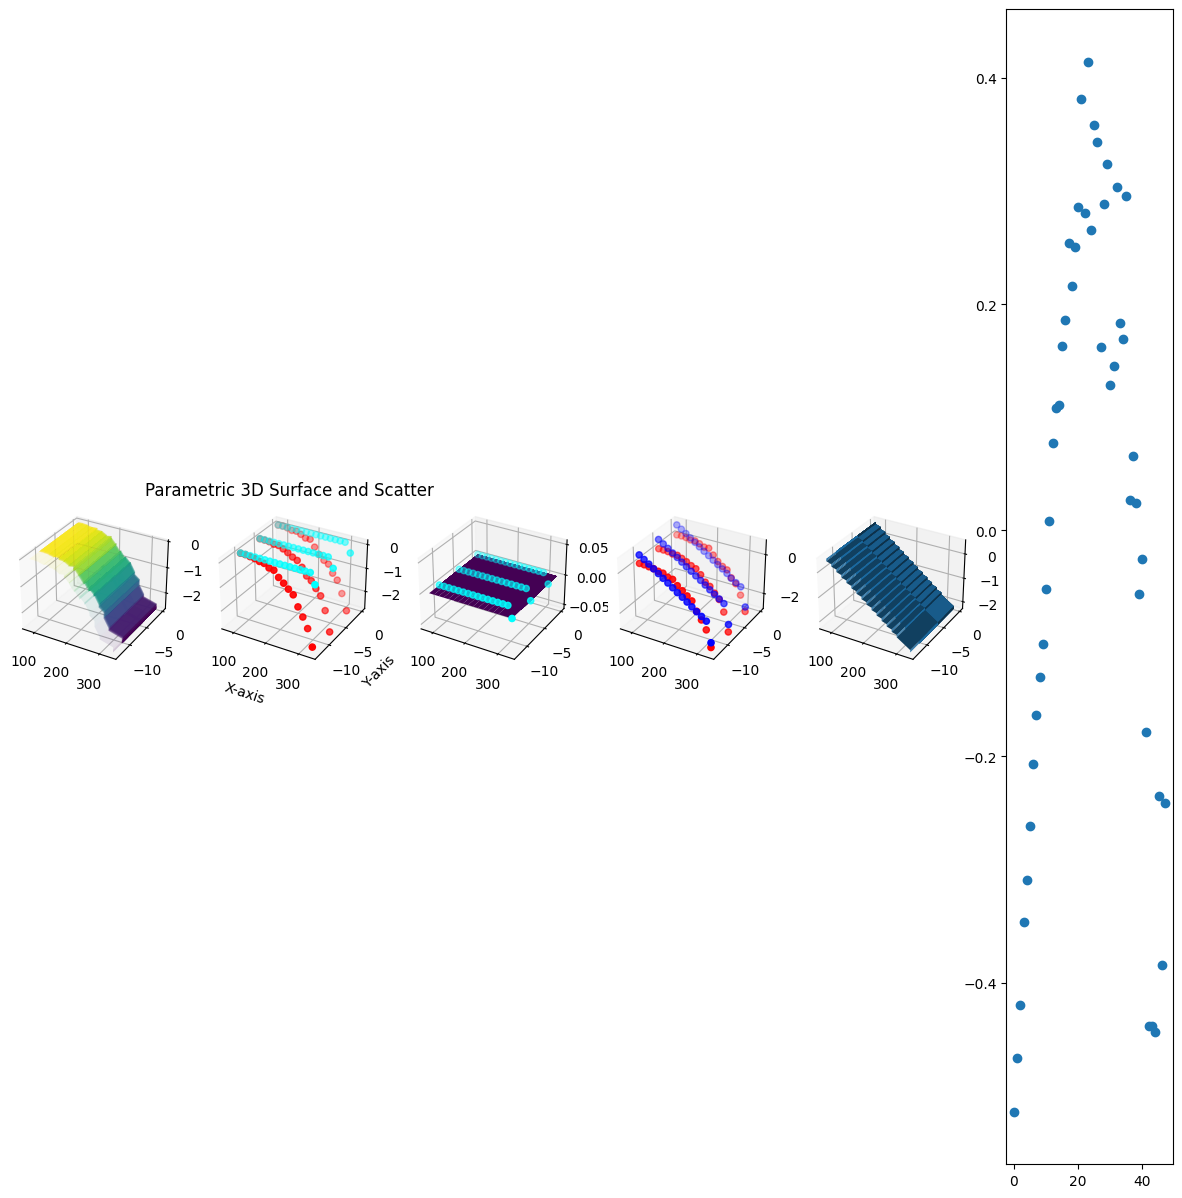

//////// ******************** ///////
Mse is :  0.059986218599826176
-0.7437891337017168 -0.791860336325658 -0.006196160735991861
Formula : z = -0.7437891337017168+-0.791860336325658x+-0.006196160735991861y


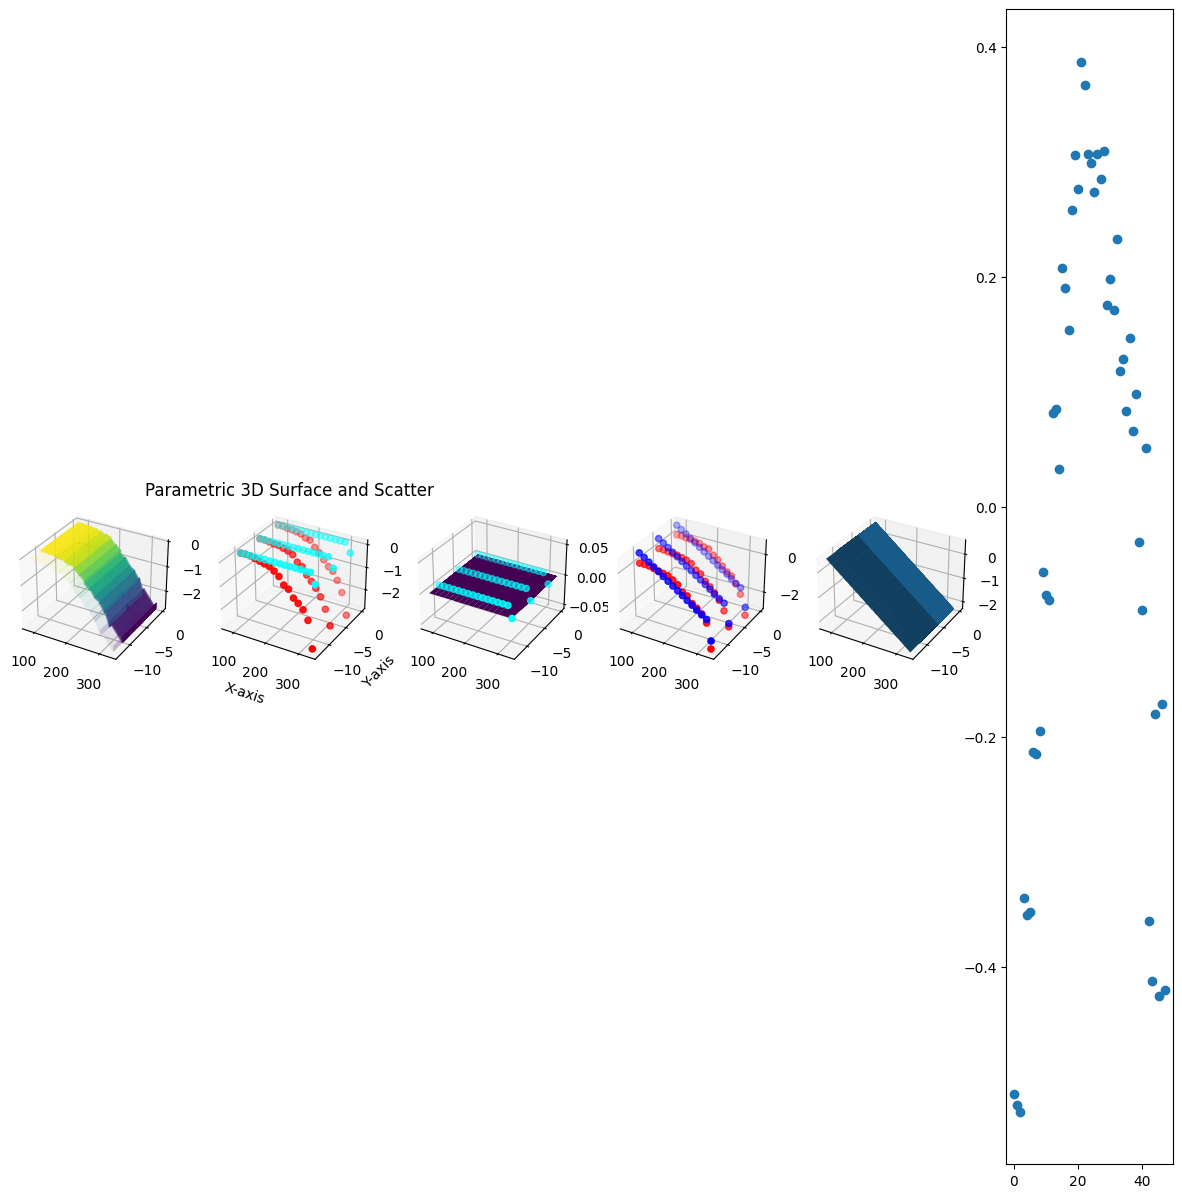

//////// ******************** ///////
Mse is :  0.10803539356718188
-0.7038881354175943 -0.8236662675971422 -0.010291454356321053
Formula : z = -0.7038881354175943+-0.8236662675971422x+-0.010291454356321053y


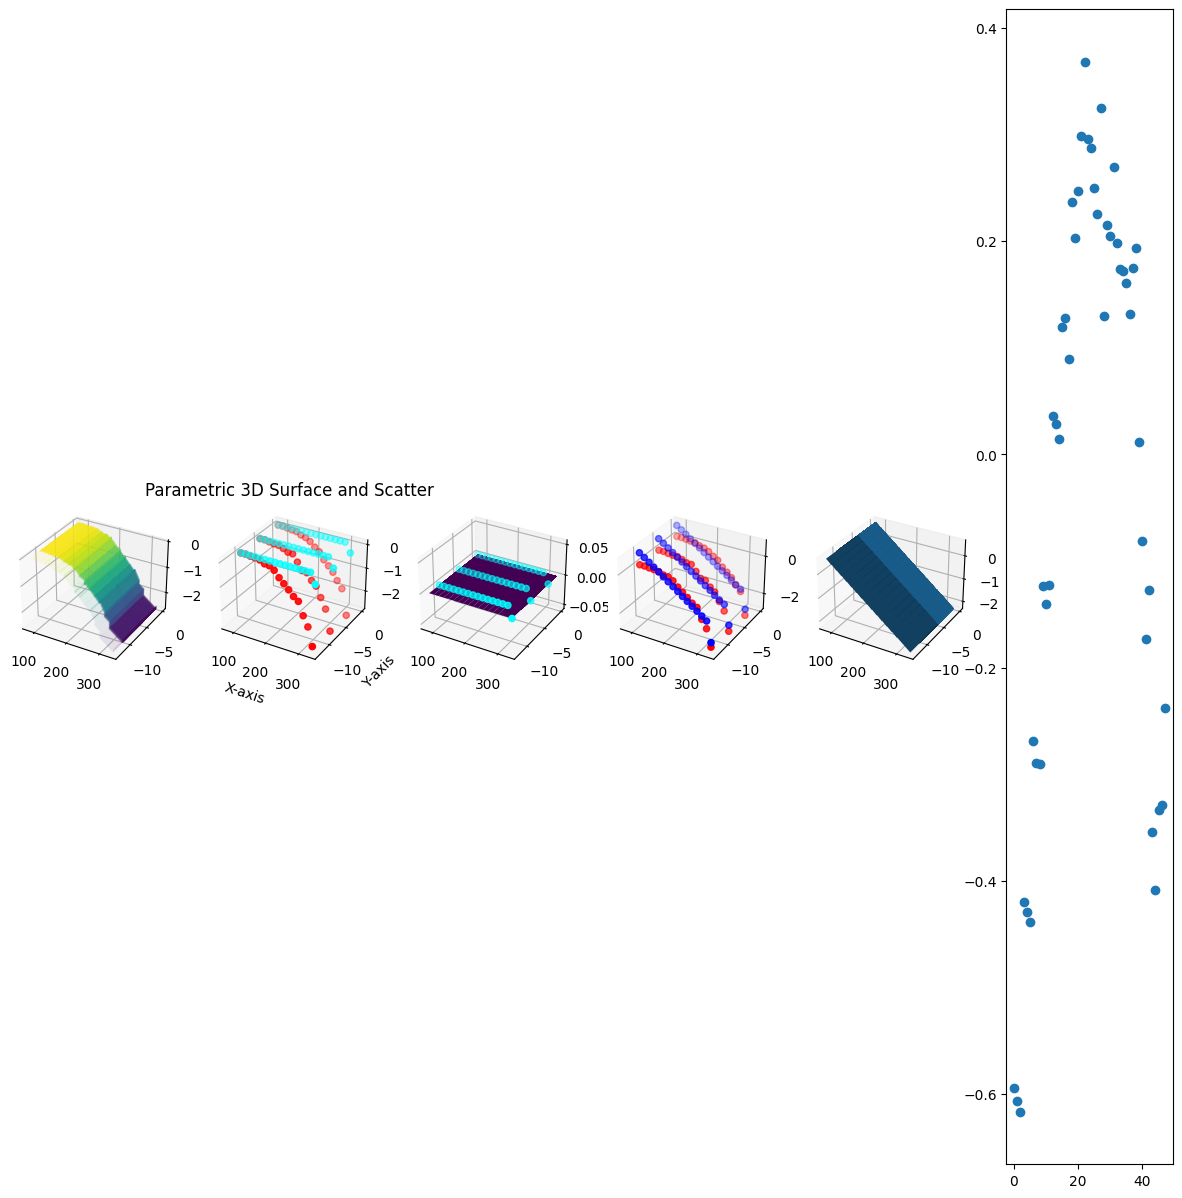

//////// ******************** ///////
Mse is :  0.10992824673374295
-0.717006305528693 -0.7032884399276961 -0.054353386376666465
Formula : z = -0.717006305528693+-0.7032884399276961x+-0.054353386376666465y


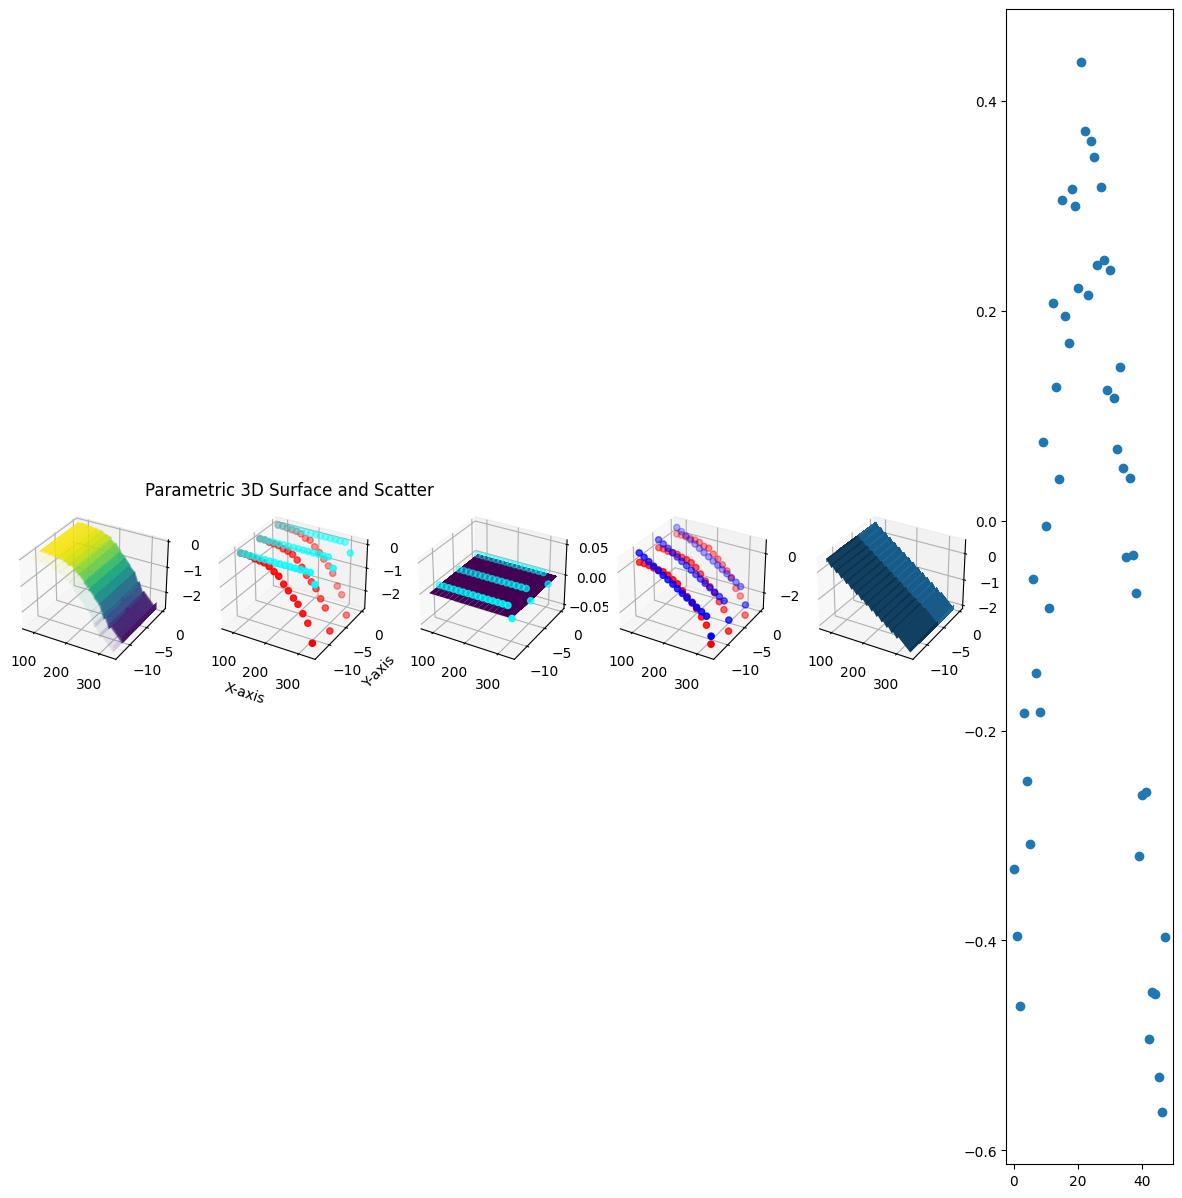

//////// ******************** ///////
Mse is :  0.09129921035670147
-0.719134096149446 -0.7431142454121936 -0.01183820239442207
Formula : z = -0.719134096149446+-0.7431142454121936x+-0.01183820239442207y


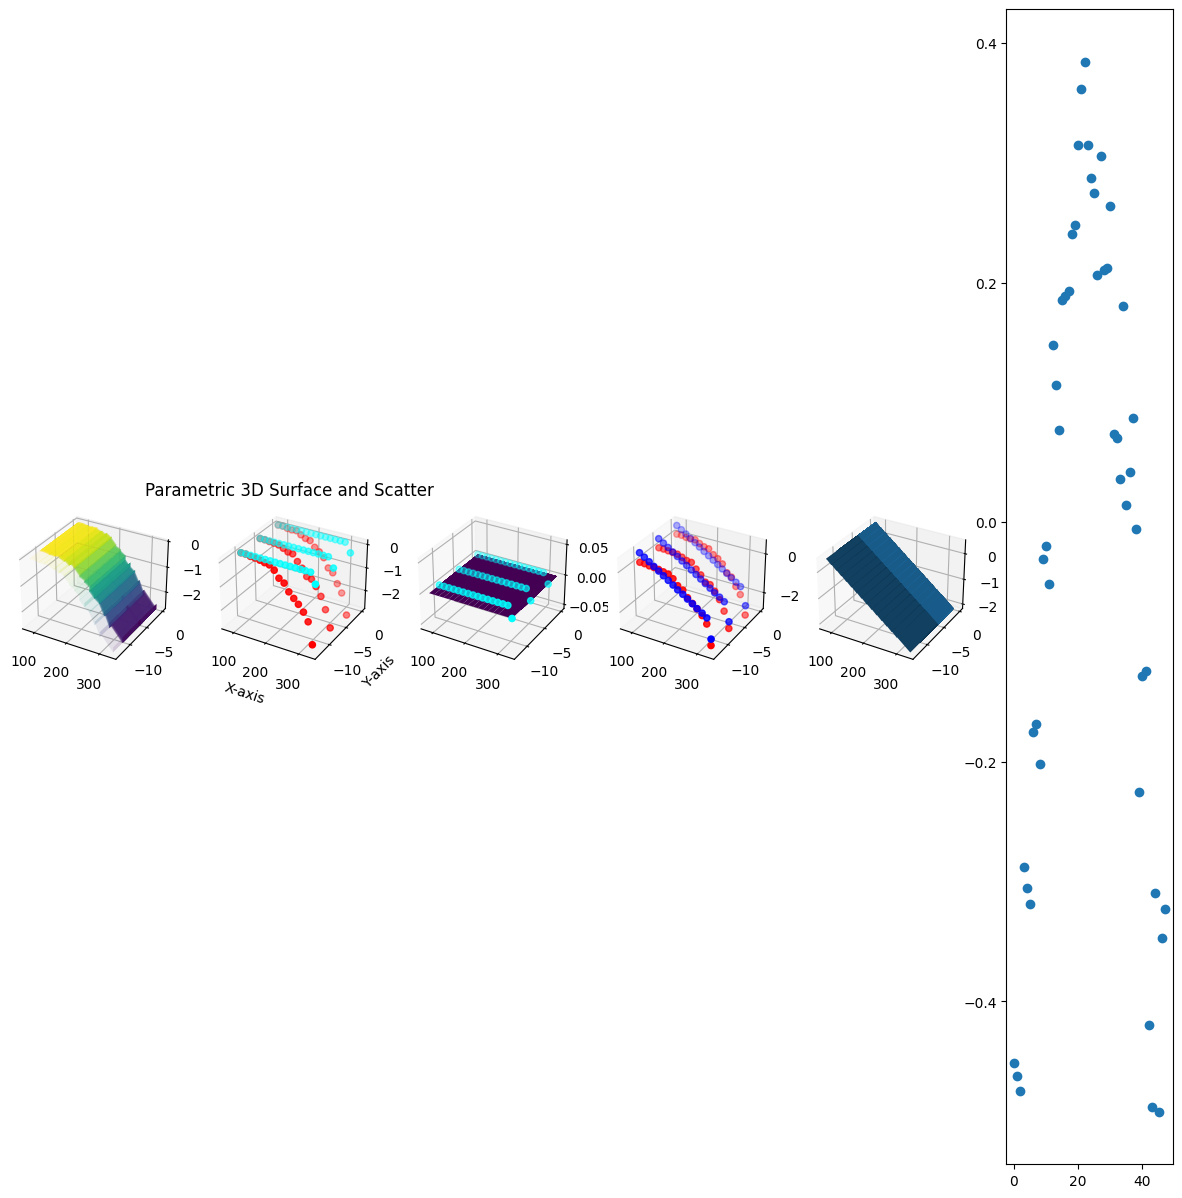

//////// ******************** ///////
Mse is :  0.06047193551004367
-0.7869078548739129 -0.7519818651230332 0.01537083484459391
Formula : z = -0.7869078548739129+-0.7519818651230332x+0.01537083484459391y


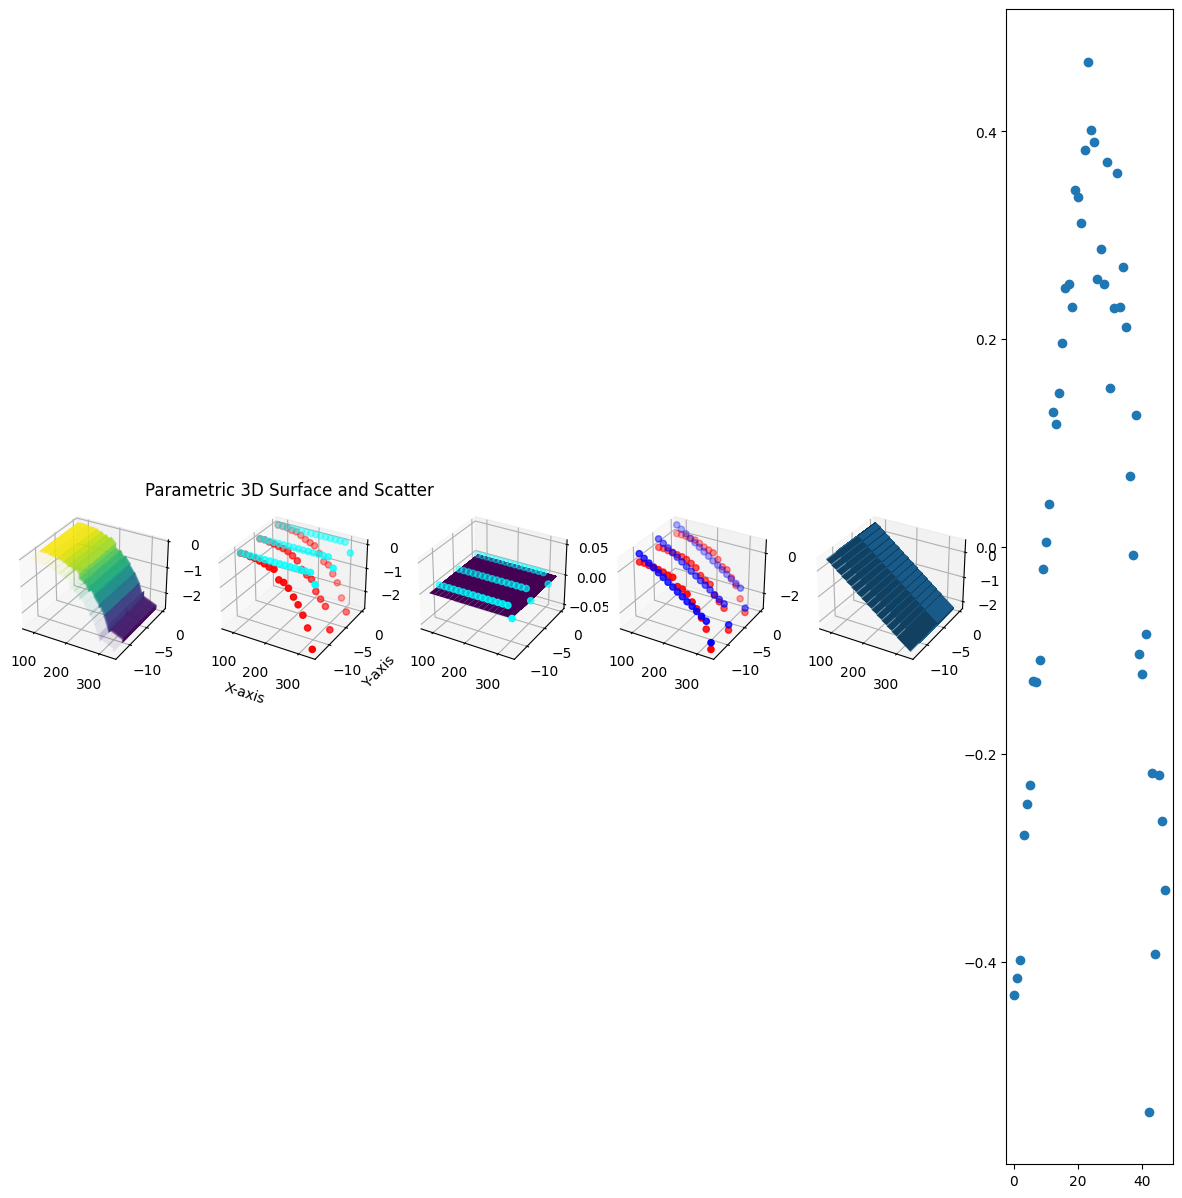

//////// ******************** ///////
Mse is :  0.08806461333501318
-0.7043077066261508 -0.8043880237354281 0.01504173694278088
Formula : z = -0.7043077066261508+-0.8043880237354281x+0.01504173694278088y


KeyboardInterrupt: 

In [68]:
params = []
for iteration  in range(100) :
  new_data_simulated_from_table_28_24 = []
  for i in range(table_28_24_blade_1.shape[0]) :
    x_mean = table_28_24_blade_1.iloc[ i , 1 ]
    x_std  = table_28_24_blade_1.iloc[ i , 2 ]
    y_mean = table_28_24_blade_1.iloc[ i , 3 ]
    y_std  = table_28_24_blade_1.iloc[ i , 4 ]
    z_mean = table_28_24_blade_1.iloc[ i , 5 ]
    z_std  = table_28_24_blade_1.iloc[ i , 6 ]

    for element in total_points[i*3 : (i+1)*3 , : ] :
      x_sample = element[0]
      y_sample = element[1]
      z_sample = element[2]

      rng = np.random.default_rng()

      x_added = rng.normal(x_mean, x_std , size=1 )
      x_added = x_added.tolist()[0]
      x_sample += x_added

      y_added = rng.normal(y_mean, y_std , size=1 )
      y_added = y_added.tolist()[0]
      y_sample += y_added

      z_added = rng.normal(z_mean, z_std , size=1 )
      z_added = z_added.tolist()[0]
      z_sample += z_added


      new_data_simulated_from_table_28_24.append([x_sample ,y_sample , z_sample ])

  new_data_simulated_from_table_28_24 = np.array(new_data_simulated_from_table_28_24)
  U1, V1 = np.meshgrid(new_data_simulated_from_table_28_24[ : ,  0 ]  , new_data_simulated_from_table_28_24[ : , 1 ] )
  U, V = np.meshgrid(total_points[ : ,  0 ]  , total_points[ : , 1 ] )


  fig = plt.figure(figsize = (15 , 15 ) )


  ax0 = fig.add_subplot(161, projection='3d' )
  ax0.plot_surface(U1 , V1 , new_data_simulated_from_table_28_24[ : ,  2 ].reshape(1 , -1 )  , alpha = 0.1 , cmap="viridis"  )



  ax1 = fig.add_subplot(162, projection='3d' )

  # Plotting the parametric 3D surface
  #ax1.plot_surface(U1 , V1 , new_data_simulated_from_table_28_24[ : ,  2 ].reshape(1 , -1 )  , alpha = 0.1  )
  ax1.scatter3D(new_data_simulated_from_table_28_24[ : ,  0 ], new_data_simulated_from_table_28_24[ : , 1 ] , new_data_simulated_from_table_28_24[ : , 2  ] , color = "red" )
  ax1.scatter3D(total_points[ : ,  0 ], total_points[ : , 1 ] , total_points[ : , 2  ] , color = "aqua" )


  ax = fig.add_subplot(163, projection='3d' )

  # Plotting the parametric 3D surface
  ax.plot_surface(U, V, total_points[ : ,  2 ].reshape(1 , -1 ) , cmap='viridis' )
  ax.scatter3D(total_points[ : ,  0 ], total_points[ : , 1 ] , total_points[ : , 2  ] , color = "aqua" )


  # Customizing the plot
  ax1.set_xlabel('X-axis')
  ax1.set_ylabel('Y-axis')
  ax1.set_zlabel('Z-axis')
  ax1.set_title('Parametric 3D Surface and Scatter ')







  df = pd.DataFrame()
  df['X_'] = new_data_simulated_from_table_28_24[ : ,  0 ]
  df['Y_'] = new_data_simulated_from_table_28_24[ : ,  1 ]
  df['Z_'] = new_data_simulated_from_table_28_24[ : ,  2 ]

  scaler = StandardScaler()
  df_stander = pd.DataFrame(scaler.fit_transform(df[['X_' , 'Y_']]) , columns = ['X_' , 'Y_'] )
  df_stander['Z_'] = df['Z_']
  x_train , x_test , z_train , z_test  = train_test_split(df_stander[["X_" , "Y_" ]] , df_stander["Z_" ])
  model = LinearRegression()
  model.fit(x_train,z_train )

  z_predict = model.predict(x_test )
  print("Mse is : " , mean_squared_error(z_predict ,z_test ) )

  a = model.intercept_
  b = model.coef_[0]
  c = model.coef_[1]
  print(a , b , c )
  print(f"Formula : z = {a}+{b}x+{c}y")
  params.append([a , b , c  , mean_squared_error(z_predict ,z_test ) ] )

  ax4 = fig.add_subplot(164, projection='3d' )

  # Plotting the parametric 3D surface
  #ax4.plot_surface(U, V, total_points[ : ,  2 ].reshape(1 , -1 ) , cmap='viridis' )
  ax4.scatter3D(df['X_'], df[ 'Y_' ] , df['Z_'] , color = "r" )
  total_new_generate = []
  total_error = []
  for i in range(len(df['X_'])) :
    new_value = a + b * df_stander.iloc[i , 0 ] + c * df_stander.iloc[i , 1 ]
    total_new_generate.append(new_value)
    error = df_stander.iloc[ i , 2 ] - new_value
    total_error.append(error)



  ax4.scatter3D(df['X_'], df[ 'Y_' ] , total_new_generate , color = "b" )


  ax5 = fig.add_subplot(165, projection='3d' )
  U5_meshgrid , V5_meshgrid = np.meshgrid(df['X_'], df[ 'Y_' ])
  ax5.plot_surface( U5_meshgrid , V5_meshgrid , np.array(total_new_generate).reshape(1 , -1 ) )

  ax6 = fig.add_subplot(166 )
  ax6.scatter( range(len(df)) , total_error , label='error' )

  plt.show()



  print("//////// ******************** ///////")
total_parameters = pd.DataFrame(params)
total_parameters.columns = ['a' , 'b' , 'c' , 'mse' ]



In [38]:
model?

In [43]:
a_mean = total_parameters['a'].mean()
a_std  = total_parameters['a'].std()

b_mean = total_parameters['b'].mean()
b_std  = total_parameters['b'].std()

c_mean = total_parameters['c'].mean()
c_std  = total_parameters['c'].std()


In [39]:
total_parameters

a         b         c       mse
0  -0.683722 -0.751390  0.044814  0.132057
1  -0.699511 -0.747932  0.024003  0.091473
2  -0.673645 -0.639860  0.008863  0.160933
3  -0.734575 -0.780651  0.057120  0.119470
4  -0.706964 -0.749822 -0.030647  0.083336
..       ...       ...       ...       ...
95 -0.752183 -0.745683  0.041687  0.085243
96 -0.743419 -0.734184  0.017373  0.071580
97 -0.726955 -0.790077  0.041603  0.079121
98 -0.721416 -0.732067 -0.044629  0.081348
99 -0.714772 -0.804357  0.029407  0.111265

[100 rows x 4 columns]

In [ ]:
total_parameters

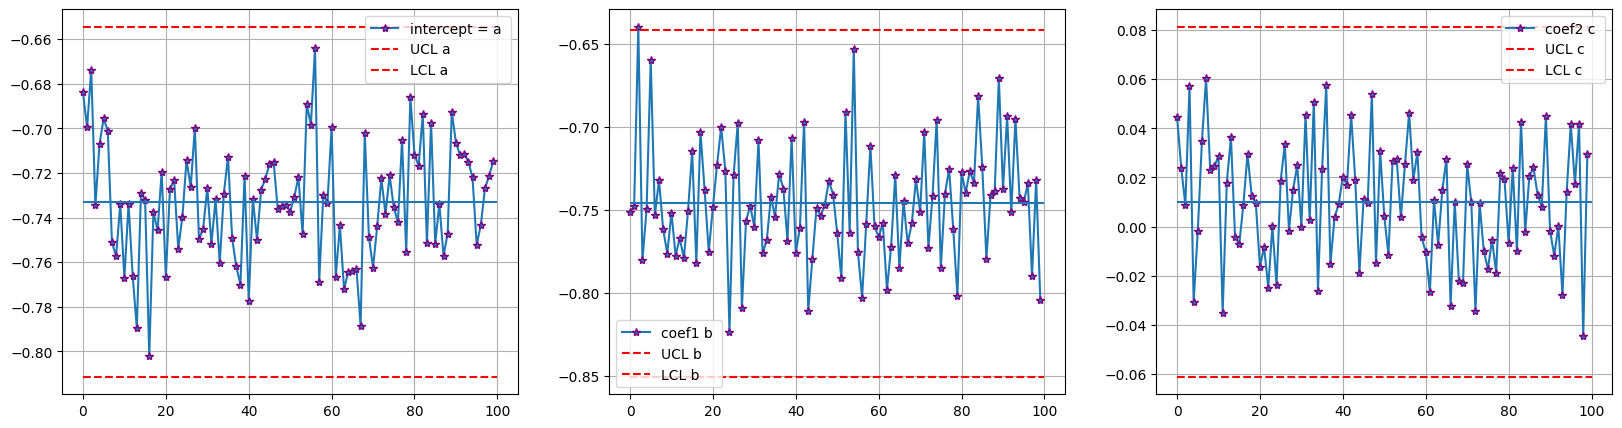

In [67]:
fig = plt.figure(figsize=(20 , 5))
ax0 = fig.add_subplot(131 )
ax0.plot(total_parameters.a , label='intercept = a ' , marker ='*' , mec='purple')
ax0.hlines(a_mean , xmin = 0 , xmax = 100 )
ax0.hlines(a_mean+3*a_std , xmin = 0 , xmax = 100 , label = 'UCL a' , color ='r' , ls='--')
ax0.hlines(a_mean-3*a_std , xmin = 0 , xmax = 100 , label = 'LCL a' , color ='r' , ls='--')


plt.grid()
plt.legend()

ax1 = fig.add_subplot(132 )
ax1.plot(total_parameters.b , label='coef1 b ' , marker ='*' , mec='purple')
ax1.hlines(b_mean , xmin = 0 , xmax = 100 )
ax1.hlines(b_mean+3*b_std , xmin = 0 , xmax = 100 , label = 'UCL b' , color ='r' , ls='--')
ax1.hlines(b_mean-3*b_std , xmin = 0 , xmax = 100 , label = 'LCL b' , color ='r' , ls='--')
plt.grid()
plt.legend()

ax2 = fig.add_subplot(133 )
ax2.plot(total_parameters.c , label='coef2 c ' , marker ='*' , mec='purple')
ax2.hlines(c_mean , xmin = 0 , xmax = 100 )
ax2.hlines(c_mean+3*c_std , xmin = 0 , xmax = 100 , label = 'UCL c' , color ='r' , ls='--')
ax2.hlines(c_mean-3*c_std , xmin = 0 , xmax = 100 , label = 'LCL c' , color ='r' , ls='--')



plt.grid()
plt.legend()
plt.show()

In [41]:
x_train.mean()

X_    0.169483
Y_   -0.087605
dtype: float64

In [42]:
x_train.std()

X_    1.002308
Y_    1.007693
dtype: float64